In [1]:
"""
@file filter2D.py
@brief Sample code that shows how to implement your own linear filters by using filter2D function
"""
import sys
import cv2 as cv
import numpy as np
def main(argv):
    window_name = 'filter2D Demo'
    
    imageName = argv[0] if len(argv) > 0 else 'inputSeamCarvingMall.jpg.jpg'
    # Loads an image
    src = cv.imread(cv.samples.findFile(imageName), cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: filter2D.py [image_name -- default lena.jpg] \n')
        return -1
    
    ddepth = -1
    
    ind = 0
    while True:
        
        kernel_size = 3 + 2 * (ind % 5)
        kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
        kernel /= (kernel_size * kernel_size)
        
        dst = cv.filter2D(src, ddepth, kernel)
        
        cv.imshow(window_name, dst)
        c = cv.waitKey(500)
        if c == 27:
            break
        ind += 1
    return 0
if __name__ == "__main__":
    main(sys.argv[1:])

Error opening image!
Usage: filter2D.py [image_name -- default lena.jpg] 



In [2]:
import numpy as np
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)    
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]

In [3]:
def GaussianBlurImage(image, sigma):
    #image = imread(image)
#     image = Image.open(image)
    image = np.asarray(image)
    #print(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)    
    return (im_filtered.astype(np.uint8))

In [4]:
import matplotlib.pyplot as plt
image = plt.imread("inputSeamCarvingMall.jpg")
# print(GaussianBlurImage(image,2))

In [5]:
def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D

In [6]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

In [7]:
sigma=math.sqrt(kernel_size)

NameError: name 'math' is not defined

In [ ]:
# image = plot.imread("inputSeamCarvingMall.jpg")
plt.imshow(image)

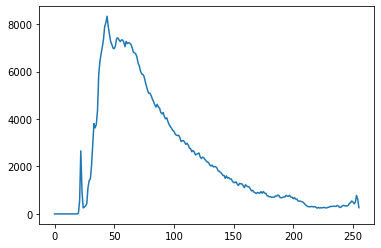

NameError: name 'linear_filter' is not defined

In [8]:
# plt.hist(image.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

import cv2 
import numpy as np
  
# importing library for plotting 
from matplotlib import pyplot as plt 
   
# reads an input image 
img = cv2.imread('inputSeamCarvingMall.jpg',0) 
  
# find frequency of pixels in range 0-255 
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr) 
plt.show() 

linear_filter(img)
# plt.imshow(linear) 
plt.show() 

In [ ]:
def linear_filter(src):
    window_name = 'filter2D Demo'
    if src is None:
        print ('Error opening image!')
        print ('Usage: filter2D.py [image_name -- default lena.jpg] \n')
        return -1
    
    ddepth = -1
    
    ind = 0
    while True:
        
        kernel_size = 3 + 2 * (ind % 5)
        kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
        kernel /= (kernel_size * kernel_size)
        
        dst = cv2.filter2D(src, ddepth, kernel)
        
#         cv2.imshow(window_name, dst)
        c = cv2.waitKey(500)
        if c == 27:
            break
        ind += 1
    return 0

In [9]:
# read the image
image = cv2.imread("inputSeamCarvingMall.jpg")
# apply the 3x3 median filter on the image
processed_image = cv2.medianBlur(image, 3)
# display image
cv2.imshow('Median Filter Processing', processed_image)
# save image to disk
cv2.imwrite('processed_image.png', processed_image)
# pause the execution of the script until a key on the keyboard is pressed
# cv2.waitKey(0)

True

In [ ]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

        histr = cv2.calcHist([image],[0],None,[256],[0,256]) 
        plt.plot(histr) 
        plt.show() 
    
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
        im_f = np.float32(np.copy([padded_image]))
        histr = cv2.calcHist([im_f],[0],None,[256],[0,256]) 
#         histr = cv2.calcHist([padded_image],[0],None,[256],[0,256]) 
        plt.plot(histr) 
        plt.show() 
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
#         im_f = np.copy(output).astype('int8')
        im_f = np.float32(np.copy(output))
        histr = cv2.calcHist([im_f],[0],None,[256],[0,256]) 
        plt.plot(histr) 
        plt.show() 
 
    return output

In [ ]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 

In [ ]:
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
        im_f = np.float32(np.copy(kernel_2D))
        histr = cv2.calcHist([im_f],[0],None,[256],[0,256]) 
#         histr = cv2.calcHist(kernel_2D,[0],None,[256],[0,256]) 
        plt.plot(histr) 
        plt.show() 
 
    return kernel_2D


In [ ]:
 
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQMAAAD8CAYAAABzYsGzAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nOy9Uah125Ie9FWNufZ/G9KmE6N2GyMd6DwICoZAIvgiUUFF6Bc1nUDoSENezIPEBxtf4kMekhclEFEaDHZEvIaoKNIiooYQUAlpRTEh0gkh3hgM0SQaxPS/ZlUeqr6qGnOtvc9/7z0Hd2DPc+a/9l57rTnHHKPqq69q1Kgh7o6P4+P4OD4O/f+7AR/Hx/FxvI/jAww+jo/j4wDwAQYfx8fxceTxAQYfx8fxcQD4AIOP4+P4OPL4AIOP4+P4OAB8Q2AgIv+EiPxpEfkFEfnpb+IeH8fH8XF8vYd83XkGIrIA/K8A/nEA3wHwxwH8Znf/k1/rjT6Oj+Pj+FqPb4IZ/HoAv+Duf9bdfxHAtwH8+Ddwn4/j4/g4vsbj+Aau+SsB/G/j9+8A+A1vfeF2HP7pdnt4/xlnCSLjr35GAEAkXiEQAQQC4Xv5KiL9HalvwuF10e3a7tvv++e+d3bl1zt94TXrCfMx+DzCZ5bxMwT5f/28tWHc03288pm93x+PnfdDXbv7vW9Rn81rPbvOm+xUxtOK7M8lPa41hNdn8f2Znl1/9smz/pHtBxl/Htes5+s+e7zVk/Zjv52Pa7FvfPxxyoU//NDP3p/f3/vFz3fcz/PyhHF8E2Dw7EYPPSMivx3AbweAl+OGf+BHf6w+6nkVz99mJ8egOgwtRLw4lV5FsHThUMWhC8fqc+nCWgtLFSoCEQ2FEtkH1AHzvFe+8mdze/jZYbCQvh6MUlRQOx+UhM+DcX2Y9/P6rn1TCeI5FarxeqhirXg9luK2Vr7m31SxNL7HlhgAM8fpjtMMdzPcT8Pn88T9nq91Gsy8nhMC6GjHynasVFpk+80cltflPc7TcbrhNB/9PIU9wS3bu5Zi8XmOA7dj4XZwXPO5Eg3MHOdpuJ8nPt/jvJ9xX7OQHQggEn2n2TeiAtUEmByzq/Jq/pxaC89nq+fLvrLsKz6JCnBojMXLWritleMiWN1ZcHecFmNxmuW45D1K5qgPDXjs65Zfr7E6hwz/6e/8hSfqGcc3AQbfAfCrxu9/D4D//fohd/8ZAD8DAL/kB36gQe4JlNAqFBKLQNwBETi8WQCmsqS15Em7OIFfAIgDr+LXc4slCVQbqrtA5fKNsphsy+WZxl34Pc1/qG8TNMrCpwLqAAWZJ4U6X1V1nPn56rW4rrgB0ABBcSxRmDrUeC+FimfDszVsS15zvrJvnEOX77vHZ0wBsX08BL4LwGBxbHG/tpIpUEoafeRw6c+UPHAs0trM680x2X/b361xuBzfDTd8YIPYSM0ux+4PrOd69J8E8n3w1G8CDP44gF8jIr8awF8A8BMAfstXfallYDy18PEAqt9TfpMfDuGYipLCMjBhp8xzqH0bpJ2MjVOisez06W4ARTB2ICglHh/i/Tyu5JJswBLxyYN4vVLewQz0AgjaiiuircQJCmsJlmh9BwDUHSYOMwVg0R7XtNQCTwU2EyzNBzCFi5fFrHtIMw8d1k6k+9Q9ldcNLlLjbpexQPXZAHmMcSwXgfeLsSf6+JADLesuhf2jS8fAXCVqtGX8WK6qv6afr0vpW0e7fg7xlvz5t2rIhh6S/VyELUykXBv4dru+djBw97uI/A4A/wWABeAPuPv/8gXf7B9rcHy0v9nAM3xuJQ+lkFKK3XpOJe0vd6eVT4uplPM+fG/QxVSM+iT/8AAEMuQuPy9eyt7Ub5wldI39mKxgWn4Z1p/vr6bBdQ5fm+7QKXYBtnRdNCmmcoyshI3AFGxguAnadJp0db+ywz04iQOBBPNvpRSyKX0zBAlAkXkmAEkwjh0MEhBEApgKa5oxkDw+qMuFrPDNS099F8crPGQSogSCBv5os6R+t5siJT8iIT8FBAVis3Vvt/SbYAZw958D8HNf/HmMZkq+M/zaerzRY0JJbjzd6HMrxC4QxRLGvQsICAPefjwVcYLCBJNG4b2rNwaygdBVjAgC8TzFELbzAgZ5Tfq3azxzg58mKOrmJuxxA6TOe/ZPa6UnEPjKflgcB4HBypKTGRyyxw1ojYFgHvOx65kccLHqu+QmQ5Tb8ksp/GB/6GfnKwAY31PBOQBF4TCha/kWy5yjk5LhtLRXWGvGswX7WjjGL49Hg1x/ZDIfdYdBki2A+l+WX6pdyH5MIPkefIVvBAy+l2MGjjZ6tpnxoRDzzxidV9RYN1AQndSy77qNF5V/s8wgL5yfHITlKlRt/dvq7GDQTzOckQcAeA4GfY/dVdhOHeyIADHBURVLRk8nlW9C5sAa91/dBQLDKYDydyrnhRmQfcB3MHBgBMHYowa3AALtkS9ff3f7pABdtzEfADeYUwf96CY89/mrcTJ+8XRjHGmdBT5jTCkrX2x8KQfjtRS/RhZh7SXYTQBbuGyUpzQhAUwEqBLkDsBLukwcvK/Ch3cEBnHMkOA2OgkKkopB2g2wj1swKIyq7SNPIYqTQtG+36Z8I1q7TxO1YA+eUrQz/j78XL5/+Xlejz7onLGotlgozg6XcfEGBN1YQYXGJvedn6/XlKFBS+GAEwgWwRHA8rq3mkQb0Uq5sq8fwAAOtXHtvD4j4gaBh83OkIVUdBwXxdfLM0wXoWYAsDOHKxOU0pInArhZBgyLK0lCwxJvII5H5ljaON+T+cMYq2Gg6iMa/REA0GPlafEVwX6a41A6pO/QwYMvPt4RGCR6efpIAObTFHYOi8aD6NpRb6nptniVLbBVFiRuyAZs7gF99et88XbniehD2SfaN+VrJd6vM1wEAGa2AYKJQz1pqncUH/M+m6L0PR77+LHPKISicU1nAFETFBdaORHKd4o3GOS11pipWAkOBCbLWQhHTmW6Y6nDXLHSVXARQAHzC+uSi3IjlCFVCgV9k+lQfp51A43pQ8/I+KmDu4mW/WWMBqZ87DM/dBzm50fMQ/ZxE21jJWkYxNCsz8kQ4vlUHhkUX426cmEEX3q8HzAYwcF4Q9A+0fx7H1QKBodaEHUDAh1MgZYCwGb5e64fAxBQHSr7TYcrsAehmtrOv1EA4kqPujrYiITVnaBgxlmF4abkBScIhZIMmCmAG694tCIEWM++C1ag3ReTFRRttbpesQMqrQ6AqnsoXDNYqYqlMf+tHgJvohBYCfns2wl0/dxXhvWFh+NBt4Nxt5/t2x+7LZ7WNthBdfC4SPMD7y/2vS4APqeC+z8H1AKUsy/NBaqAmxQKeHoH9BbcR8xFkhmMZyiIegMf3gUYMIlI5iiVL8RXUh/ZBHhnBbJbpxTuI+lrR5yl7ktrVVRr+ugbslJ5ug27sLId++szllBXq7Hqe0aiiMGgMHeIOUS9gGIeD74n2+gtnAQTE4eJwdLKmDlEg5bzqirhE69UXF+OmbEuAugpUDWc6SpQurZch2kF8zljOpHTj45TBWojnpHCawlUNcYP1hTlcpTdQAyVpTbbIHW+f7QZaP5Lw1/0XwBOHbfZfRapz6tcgJaEsiWmJUf6oSAV4M2fx3OJBWMQd9ANNLPBaDN2kTEM3jt0CINZf3fHuwADYFi9ojfhLpTbMCnbEOCmiQ0IxQZyGu3qJtDb8hS+GOgeRQGZwmgg59WBcb9xX51twKMAD0AoC9FPX1Y45vyTipvDYDhpCWaTqPx50U1R4pIdgzCDCXBKzBhoJhSJIQKroyVBRR1LBK5ahq+f2TIRKbLj2E/zWatZl+cl7a1EpgkIg0XU2F6AvmIgaIbDrLwZGKxMPURsooOVY7Yon9WzL4t5es/XbwYACZw+eRWvhxqgci/RLIHg2EBAOtcnxy6wRyFi4UK4w9LgBD2IZ/UCgvhWzQNVsLHd7ZKZr8CI9wMGE+YpDWQGNWxXy4iyzDHvPAGho9tMxb3GC8LyooSg/ktw2BF+0v8xt/2QfdcCvCnIBIANGFAMpK24QMxwgoG3EVScz4+6YLWzwSABJlnBaQ4VgkJ+VhU6qL4gngsicAUWBJlgQDnO57Hog0xjptVsMBqIgH7WPbbRp0IyIDZV/UKpB2Q1EKDSbeF7X1Ua7wUYZlr7xcCjkIHsz3d2MKZUxnfIJr2Ac6MHPTwXINg6dRftjLFIAX0AKTW+g6yy3zcDsM+YwWRJrx3vBwxK87ydIUHEDGh6Biu4ntfptSWCQ/NcHe0uBPaguWesckgfrP1CG7223QcXl2TOXDAjUBsMrm5NG/Mp/MOKS+Slp4rghAJuEENG3i9SlhfY3A/iKoXfgnwTCOhbxqkRPPTBthJcoflJ9lsCAZnPKQbh2gICFxFugFS9nZ2/gwFaJxzbNZpVDeAc8kJFj8GKpCk+8wYEpaxzpihlLfuLYjbHPASlBKb72EcjyAbyQqWcHIdru+vqpe3jfX6mJS7cKEAsYzF8jpRVF0QsARZNTeC83vdLjncDBuQGkvRHINmZ2aMX9wAYSkr0FLRbIKH8h/ZJdgCggnOMTMdonC0VFJC6B7Z79CyFbm6JXoFga/CwkpMpRIOa8qbSxR8trXPQQ2v5zUvKw/XrE6THhnQ/HC6+/UzhbfYSz6+8kio6G86HUpOYWt9njubw7NjeFO/hNu1xhqsMi+Sag6EYc+wklZ7qSDrPBWR360U6GyhgKOxob+PXALFXXslEyir7fs2Nmm+KKRhfKV8f6BkCR/SdU4Y8ErsMdGHSKKRBczW4vcII6rxMfz453gUYsGNEgJo53YAAW4furIDTTT2vTEAgKziW4paAwJRVpsmeAsjJIVKIG8QEp2Ib3I4NyIhDBBDEqrmRBjzAoBrcF0om04rBTgiLZiXUdZwOqOG0DPKNhj0IsOz9UyyBQJBuw/xZMzoudMkeAAGA6KBLnNzir5GRWFQdUwgxLKwXqpa1l27+BfcTIMZneW3v8eOEGv1kMI5g+6pIBhWNLPCC9gVeg6HOGNF1GKMdaeeLqnsLs7csX+l5s/pwXyRZmeUf+/PRIMqS+tCTcUErw9JM63s53gUYPBwPQJBCihbyqfzx+56j3oAQQHBbsax3SQcQzRx3ez7g4hay760gVyA4NJbWEgzWimg5sx35KPVaitrWcVaXYVowfXI+vsPgp8LVNvflekj+u7Mn779Ourwxg6IG/b3k7eqCXZo122Vw5Dw4BE5/9vI8cwZki8QTFErhUxNHpl0DxsZ3okc8abIBli4CP+aOXAKcMzMbMyAH7dcHHkDFYhuuLG48j9Xs/jbSl57odxiTIiOLvIrpPAx3phsDxswkkYBRLQEui5quffXlx/sEg3GUYDw7CQSXWMEOBBJryI+FW1pyzhmbO9bZmWwi7Tachly3nyrGGIFoxSBYMyAAod0EGY2eBmM+E2c1KgsQae3UIWd/l5YCbnALIlmR4526xEv9eAE5PsuTgFf70W2FgzZLWchaWg3APQKPMV3YqbIMyk11aDEnCABTYPcfCQj9uQocTkDIjmG/RpJO00cC/Wn7Wv6ri3CNQ7A9LV+dK6Gjf/vZok9LKZ9crmzZaHswmY557IZoh5Zq6AWvRQCzBIlBsa4A4JfzreNdgMHVMj8qfVPvbaUa0iWQES8Q4JAOHkYxiThDcSWpNmBu6e93rgBX252n4MzEGow2FCtYioMFKo50QbLIxjQj7klN5/MmI5gpwfzs6bl68GzRIKCsTNkFEqhkdyg2IJgshBaFh/cPXk6vjPdkUFEpRRPk7Jb1NGFMgzlm4HeCAfNHNoHcNEf2wR+Bhkl5pxKCdyEIkFkMi1/5GnQT4G8rBN0R7IHono7elb1AXsKdKtbzcIPou753gxLdGekJm/zKaGni4xW5Yj3JYAWX4d3XVX7Z8S7AAJjyMAaFAph/L9dgG7CZ/TbiBSIVOLwtxe0IQDhWBxHNFXdNQJAzweaECnAXw+mS9QWegQGr7vTP000A2Qfa6lPltmQlTHrrOe8eGn9F9XIZLINN1ygYe3AwJgJoM6ldakqoMzLNTzgbe2EIBASFVPag5DktE61fAxS6L5DCKj3qV0eYoDZ+ec4OeLPLnHpUV7q4B1fkxB7AJBA0C+w1FnMVJvvNBOB8Py+5qWD2YbVx0P9ehxIBYh/f35mCbHh5vfy+zkIe//5dHO8HDMZ4hyCjFOZhdRqn86ZbIJKZhmQFugUQX9bCy9ElsoCIxB7LsO6PlmBplJ2iIAmGgCwygy4tdqxgBuUmYPiIaHpYSvkgZCEgpzrkjPZNVhDC06JiTRLQw76zmz0Tcs99mF/1ZAOMqNdsDjDkq4HZEdHtGB+v8eG6+wkIsZyWz5f0uPoGF+lv6857dxbjAAI0ENZ1JhXHLKV2mU6sZ5J9HDL4W6s7t0ItqGAq401URBeJcKqgyqk9ZwdDHkYMQ7p6TcePZJ9d2cGhmUZl7Mq8y+UovZKvXNb8fsBgUtsNAC6ugQ4moHuMoFbOkR0wbsAZBVrxRJqI3s9iIG397/eumTeVWCUYQNQbbCC4gkG6eRsrqGe9Kme+7w6oWSb+YPLGS18ZTiQzvzBTKs/efyMpatBhjMszm60i4COYV9CQbWKiUrMChZgnys3kG15+0Hdc25xKRjrc9nDg0B4UnWDDgGDfYYLnYAaXftwBuatC1SrXBIRiQRyn6Bb4SPBREZyj3c+PKyAgQ7BeYRKTDigPDC5GNvtTnGVmRpGYugv7dLiIRPo3jncBBsUEsCvKnB24CnQvU04GQHagAxhGLkADQyiuSM8oXNOV1ym4JzM4zcsKsW01rZizCOEiMN9gFFgFLoO0CyGVst2EWB6sFmA1gYLmr5lF02AqAKl1uwcNqktklEVresxL0/8tXzOv5/0oYFJPxCoMywXmGtmNmsCQprHUjxeYLkk9Ugttc+GpsHs/UZ3mqsPOKHzys/eU4q4kvPasedFVoma+SK+YZKNSEbN/qZD970Wwx/BNk9BsLBOHrt/OZ64paF6FLCtl4IIamOtV6u2NYeHV412AAUD/GTX4GxCobIhdLoL2rEGnH++r5x6yBVNxWbTT3B9YwXFX3PXEvarSAqRnZAe9InIHgrfzDPr9zUIXGDiWSUx3ljUclpJ9ckb236mZPDSU4BFQZz/srIs6yKdra0VhahHtGZKc785UZmX/5XqDM2kyr9dXp7I2ePF6tF41IUBgE9mEOLAiKISg8y0qNkMGUNN2Y+q0hyDHYYDAVi5uLxxLIMjuyPulIg4gf9vq7h+6svXt9ydGsIaJ8QlrF+Hq+vAaBIQdUN9u5vsAA0l/6SKwvexYS1H79VJZh4h+BQF2xHifn4XE6txtqbMq1jpxPxXnKA1+peJboOniZkxXoZCadO0ZM8g+YHS5KxJjvLKdZ5TzMsmS2o/rFh7AYDz7BNyrJXMf2pgDI+MjVEzS5KXBDGIVYq6wlLbhZQs5y+ADIBpbRnt34Z6AyXYwMedBpSo4N+bpZ78M91oEl/G7VI/WHt+ZvyBoEPPLzEkB4DPhnobhyRHjP1zHS6xC+dXsP5vJWzT94+GmQeizq4i/dnwlGIjIHwDwTwP4S+7+9+d7vxzAfwDgRwH8OQD/nLv/FQlz8vsA/FMA/l8Av83df/4r74Hu9GfTOouKMJnBxQ2YacH8XpuTvedldLggfN8lClXDoYbjFNzPyAa0J8pWlOzS6Vfr2yXHLkt8L2AwmUHMj8/nOEey04m77i4Ma+sztjHG7QIEY33BK+NAei0gLe5pxha8+Kxq8Ab1C/hCcPJ6ReefqUj3WaTeRvl00hv2bbGsvHHUUgDUsFt8Z3svQLABx2Ahde1LAZwLK5h95cM/aXeknSJ/BRFokVN/m+lcgHBjvoPhCpAzt7GidVPuIh1SL49ylvd4Zdx5fAkz+HcA/H4Af3C899MA/it3/z0SG6v+NIB/GcA/CeDX5PkbAPyb+IrdlHhMtN4ivE9f9w07rmyge3xM5WBftSZAKmuAAfcIONOVOAYrmJt85FXLwvFaGEygA53YWMNE/g7ugFcoq3aaYJ0aLOAeMxt3FRynxmYm3ITkCgg183FhBxMMBlXdFu+g+4W0W6WXepdSEEABWO6l0PcYwjg7KB+xg98N/FH0JCpKiLUuPVq3vBwve7lPKeYGBBdW0A/xtH8eysdtYOBl/RkEZZozE4ha1uZ9niunXn6eJe1Vo8BsGZfsvGIlQpZ5MXj1O9lBj0fEN94+vhIM3P2PisiPXt7+cQD/SP78swD+CAIMfhzAH/SA7P9ORH5IRH7E3f/iV91n82uGPk/kfBpYfEbr0IOyL2c1mOtG+wXJEhDZfyuLdpxLs/5gK1nltZcQXBkDBhPZhW1bxDTae6Xi5o5lilMNywSHxk4991NyRyKtnYl65x0fwc7q0AS8dp3KsqfyF9jZDpSzLXDJWQvfCqFABCr+4I5c/dNJo0lTe2wVkpVV4/O5CvEqE+O+LgJYrNAz9mEhhKfS7CDHca64z3Z9wSw0Mp+jb9rPwbJtNmRg2+Vo+DlC+cIlVX5zV1uGtzR3GrrRfzRGtu0Q0+A6dWe6HS49dlPWrsf3GjP4u6jg7v4XReTvzPef7bP4KwF8NRjkv20xpa0tsFnejWZPy0HrIQQCPGwbtpZhmRUVn3R95c0MjuW74lNRehFMp7xyCqufY8OEjRLvQcb5HNl2CphpKPgyHKdFDMMM5wUI7gSCsxfl1K1LILTBAM2S+D3A4WZVbNbZEHTadi1x9ouFrfsMVoSYaqsiq5e+yMuEAnp85oRAckl0sy00vc2bxjoKhYmB0fxW9DzIEIYWF7+RbjnbznJxDxacl2P+xGAd9vQc/VdjgM5bkH017Rpxr0PHlLU0GIigipkECHrJa4l8d1YagWduQoDtW8fXHUB8hjtPWyBzr8Xb8fybzy57la7Lz6SLwQiiKs/9VCw1fFaD3g2qttN1l6r4IynMbHRF6n1XIk0llKTr8OHDSlsh/jqVZsYTdGMJfU9Ld8FMcS7DOmM/v1qAM9jAfYIBl/R634tFN0Wk3INapCUCnJZMynLB0Yj4D/4t7pl01H1dlHQD8q6ZQMNdAsznlExycq7K81pjMLuR/VZAn/oddRPHZ7bxyoaPMZn9S3FpI9KAvLslMq7TBmYWVaFR6JmLvkUzJibDaSXDcWHbvkfmCIgncNAQxsKyXbkx+gWzHy79Ev2ei87eOL5XMPg/SP9F5EcA/KV8/4v2WQQAf22vRcyAjKSPNpaCJl0NQYxzLqyrz6drIOKQ88zssjMo+n1Y5upNxco5JApz9TCv7QxeSZT/PgW9WGBfxtsy4SWgw+ZB8CTSnyNIC7RcEwBCSGwEC83JDpIhFBhwtWXcisLIopvlOplDTgPDfWX1xv2Rwbp60xyuwwWghmAI3qCtKpL1GYAGih34ggUJYj8GCWbQwYUGg+5NeNZyHE7LFJ7Nik8/xSEPpqnbLYMtcIT2j29rCjz7egDBXIPCa84cl5mgRiBYAwgeY2F141LwNw/plzY+AQRMF3/r+F7B4D8F8JMAfk++/ifj/d8hIt9GBA7/2pfEC4CL8kAirz2FUShUzkFD+Piea8EdlTBjE8LhQC4HlvNMGnvuPuHWQToWLU0LAQTJ6l1tIB1BdhJiexQey/aJo9aj83vl19V8d9yvjXHOLFjMdJhpui9jzT7ZwXAf2kL19SnsBQZnF9hkd4WwW1ih2daaqYhXLTQYtLis0XTfhuGSBrwK8joDkRZ9kaXe9mnSQYWdbGPcY1IGtnI0vq5UJfjLb6ifNyCTtKVUrPx4rzEZ5ekubsJkBez3fWEbk97Wxgy2mFIZhmyLJ4hdcomvdFvmDzIGaPSj7598OL5kavHfRwQLf4WIfAfA70KAwB8SkZ8C8OcB/LP58Z9DTCv+AmJq8Z//quvzCBfVAY8ipYpRS4NUz9PHpJIBYDKm0KQC6EowI4FfJKzg1ll9eQ70SqjJ/9FRW1pzIKGoMvCUilSGKOMLeXFxB6xrFETi2IpdiWiFhtJOdiAiODUKrkT59A5cmgPLY2ZhrWQKp5ViA4+zFwSDuxpEzmZT+R0GyKo7qVDZQZqFl6piWMmb1HO0z+0FOHxvae9/CUg9IySYAcTKL69DaKULdoe7sctQJyLhcg20bgzgmMdg3O12bK5CAtUMvNb6Fd+uwzyZxYVyY+XsXgxnB4ENCPrJtpkKn+2pT7xxSOvGW+TgS2YTfvMrf/pHn3zWAfwLX3XNh++B1D4pTVrh6IB+EPaIpK8mxQx8m2JS/mytlnI2BZyC5H1Z2HIcuS35gma1sUkd82s5aJbVa9UEzikyC6DiAHY1HmpQ0gQGwNxjG8O8iSiVp1f9qdMDz9Vt+XyWoKjqwR5Og6oWUGxUkW5CggnfLwFzh/kaEfKouESCVbEIjTl+9sdUq93nzmfx2WfM9iPoJRgYUdHquTZ2MGQl6O5X8N1h9fs935QCl49sQCC7k+C83gSEeXIWJ+8xZ5CYAv+yFl7Wwu1Y5RrsCWrSWwBemkcAn3GJckn84Ukvo4Ltmd8CjfeRgQjOoY558hoMA4yKaRDXAoKKCXAg+L30bRWI5X0VzkKO9Nl39kn9VqD9chzuWLmRCJGbQuh5HS5SUc2diMIWQswSEPL65lURxwH4mS2VsPi6vLbN2gZLkkbEDVNie9ZfRbpOfu6iLOaD1l+UU3YwgEitImQcYaO+ZwOsJwjnitsuibZp1AiQitSKPraVqwK3gKYj2EC5XXEzuoXzHtXvOc5F72czpoZMUBDKU4Kt93cnyZje47jrBgRXN4Hv9/VY/EaSFQQIvBzxegw2MAOq6NYNhkOwubokIxY1QGLiwJQl3/95erwTMEAxAbKCGGCJbb5ARoAGgnIXehkoo6bAxcVqjY+gGX1NESC8VLivYR3juocHMCzXLOQxrGkqaLMESWaDEjxONQkxza19zzSEYlobpcAdy5u50MKf7rW/w/WgFVPtcpq2ReQpdFoSzs1oyAjcAwTPo4UtdjtqQeQzKxpfNziQDhAyFjKtXBRBGTGSMIPhergOJhjgqfCe0subPCvt9Sjx870rO3jtS76BAG9BHH5gAfA+FCMAACAASURBVOabks6riYypxKx7QSC4gsEeGJ3NH0AwAeChPsMMTvObA1Tn796feu14P2BANJO2CIacQkqF4tQTK+NGLfx2F2ZxT6CVjh1HIRfLakJ3Dn5TwC2RxBzLHGv5VtJsKiuAFn6N8ubCYKJ3jgIyQedEthth4yFnReTCQssFDDpqTbraStfPSeYgirFGfk9yKuvj0bu+whU53HG6woyn41SDWe6TWB3qVQqVgV3hc8DpJwQ4SgBQjcbsowQGvgfLGQIVSJaIp0TTlvdMzBMX4W0Zfzjk4RwuJO9QAhk/74ppW6xgm/3I519LEgiCGTwDAx6W/TrzVep+W2KY18I0Js6ZYwDDLuszMSpt4ZvHOwKD5G2k13Bo+s1R1SfXe/sYp4eHm3wvTk5P8jRHVkV2qDg+n3uJkKL1RlYwASEs8JxlSIJQ74WQKzjRZOjgHBBgxbnqACuBS+zecMBzVmFYpExwcnsswTbjHyUIoy82hZPdEulSLFBwFo58Xk5XHha7Lpk7XIKdzH7ajLSjXJqdGQxf/NIWjCSo2reBOwmV+5CXf83SX0Z+QsVkLdMdKBdUeH3ZvjePhwQjCxCghb7mFQgu8YJ1YQa3I2YTUoaQbKjZbrCfed8tYDkZysM5syF3YNintl8/3gUYFK3xsPz0in0InA8e9UAWS9CuPvKIXEuDQvnIHsErlc5oQHYcO7WAwCyXKufafdYtINikpHkqBdNlK1sxkVzMoeq4u+MEcCKCQac51qEZbc/nnNbArAR7JhLR4lMnp3C6o4Cl3aLURQOcc9srlf9QnNbnqvRty/EgbfehbcWtkKgY/Z03Lt+73Kd2bWYgsObDB5CQCb1+cMyvZ+84NMHhGmd4AIDBRoBdISungEAwAGEXww4cHlkf85aM4JZM4VCtfrFMWIM5TEYbShwH+3jyMwHlLWCYbPet3nwXYPD0GJYBaMsbP6OochWokLHYY4DABANeoNhCdtBpDpapoHKX76yO5RYRYI+txNeK6UTRwRA856IlrhSvofB3x14kxQQrLcHdAxhuy3Gc05dsmti+acAki7rQAu2JPM2Ogu4WGkSbZfxdFJoxEVuKZZkAk2BgxQ4kg6AjofUBkfkrYwWyAfscPIdsG6z0oBbNQBdYxaAHO+BzEc/MX4i9qDzvM5wLkf31cpahKeXuqUNmdoZrYLVD9nQl2K5KImPhG13FEI5ZaSvvJVC4WTqXO5L7UPStz7F9LGQFNGJz6vl6Pr8Gj3cDBsNG9KBRh8d7+wqvAQTaQMCA2bQyGyig2UiDQlJhA+CxJbZ5TFOeLgECZAker+rt+waQh4IbYt+TqexRtjuoflhmwTrDIn8+DcdhlYpKnWi/0dDR6p2GquoGCLS4fNRIYwV4463OHgFBvbLhjqW5LiLOg5QTCN8+IYkDRnWj9Sf2FBPwVkj2ezxcMqlXBUHq6mxvAQLoaaTiWQAktzAHeh8HGV8vN6G9BBB0q6+BUnKbIDBAYTKGwi4C0ggespDO9eSyZBvyMEhS9RKZ1WQxG6MpAKO8YGO123NNUHnleBdgQIvcxmMCQmfoLXZypW526TGez4BgWhRI34cstNKZ3StSbgaon7XH3anBCtRjlkGTJQj9P0kQSJ+bIHA3nr2pR7YIqoZlmZ56P7v92S+0PkZI90xmGaXWDl3QZQkIOyOKJdSOlabP4TELsLGDdHnUw5pZn4etUhC/A4B1rGOz697Utt5py9y2lgAnafQnTIwPvSUrwwK7CpbFayR/ORbzEIRZgw2iEzDletvs55aN+P08e3GY+0yI8u5DNDg1INBA6WaoNoY7tnDaGFdfuly8SOBCLcy6ujnP4gh7APFvITeBwdWpxFXhSCYQKJauUepsNSAs3VyEq49KizDxttkBem8czlok1RWTUJZU3tMWNFmCqkO0i1IaUvlPw+fT8Nkcn3PVJBcTEaE110nMtNStoMbwD2klIlLdwaljxZLniGX4CHCmUAKwmKjDYpFTdD/Ufn7awhuuwkrhWS1AJ8behUPJvWWYeQsV3UZTWYPUdDDcS8htUmIkbJXCeVk+tjlyGBQuAcitADq0yrb08HInQLEYFuGiRMBwE5MV2GAFFyx4MFyV5PXgpmJjQ5wunj5/saFx/fCaJJ8hmZZMefYeB+9x6Os2ILyFtu8EDPZA2OZ7CS3gVID18PPSVQzimsgRdxg/POFatHacxgzh83ZbWX1Iw03QtJ5hVekqSIHBaTFT8fk88fnMhURpYWzM8YT1fpKOSl+wtQmC3BeCezYsx3E4DlsFTKrebpQJdPXMBXdx1meZbhRcjWday3H4GgqaAm2xzBhFPZ9T0/1ndnlmLLkDbrX5yGMCDbafC2oo/Cpju/j9e3QlamVlKVXLFl0NfmC6Y3U3ny7CHrh7oO4iWZ7+8ZyuU6V65zhsKx8nyA6l5T00UcxFqory05kQIsJ0f54wt2fHuwADWrwHVqAyfNkrACwcRwNBsYJZxIPH8Fsv5LYsV1kk7N4qfU+IQAyZ+uvQ5VCzUp6OG6CWFd/NCgju51mLiazYwSwO0iA4wWCzQNkvhwUAnOY4HPW7Lm+GYGnpHVgrgOBAJD0taNYdYD8wqCdAMYRgPhEUzRac0ca7WK3lPYegdV5ECzrTmOFc19F7DkfYwIf7YP06E3oGK2A/uFKpE1zWPobLAQjLu6ZiXa1pMZdHF8EdPZV4BQGOVYlGMivpe1Aeii15GIh88gKf87R2Ia2pfOmtNHRVxqt0bcxyga6y7Y/y/VXHuwADCGpKrVlBB8d6j4JM2piAsLQitwSD7pa0MtJrF6pbaHkR6+KRAlt/pK88/SyRnBo0aLECg4hWuWsGEWdBFb42MzDYGKEGghEvwR5dJmCqWgb3Ij/ghFSwMoq7YrADYGm8f3pMYx6QzGfo8vRUCqNFFYEsje3rePMECpwGP6NUuqGLkZSls64sVcDHsZB2p9yxxUcaRNovZwIOEXpSfEFucIsp9JPuT9ZBZeLMBnu1mQsVFONadGcmMxORnJVpi98gznhEk3cmKbF2BFkSY0FVrOa0CDCzv7yjMs0OomrRvFcZD/QJ7L9PV+Kt412AgeAKBlzXnfGAtZ4wgjjXGkEa2QciQrVtATAUuwSIgIG2Wfxc+8ZO9hmDYBFwE7FkBfZYXcm76EiBwYhKU2gffM60BG3BekAJkpaWPs4z7xlKvypu4DlLkLMfnt/xAI8uHtudUVRWyBICEFyClhd7AD8bS6xLqWoqzsrqzaW9kTQWyrRy0xaO15ZpN3ayKiAoajfYgYdtXmQl+ayWuSOeykcZeLCc+T23XkY9x79AQHL5ed7btX1yfmC6eH2PBsj7GTMHS17rr3ZTZlvbFYn3FekmyCilNkFB5AEY4jrkYK8f7wQMBNwduQuecqbgovzHMYBg7ayAgZqirp48n69xkEq26+5gd2Eo/5bRxU8lh5cqs2Obi1CU0EcVolGm7MEHxQQD7h8x0H4Iv4pi1YKnUEw/AxQWLsxANdyZAQYnEG6FM1eCvi5KO4qwiOT6A938VT/j7ydi2lXUGatrH/i0h/oKyGcJ98VhGdPg8znGVJ6zQEt+L2cfCByyAWa4CeaSpdsziMcqTry41Ev0vZBJcD1o3m8AQiti9EUDiOTu004B3tgBeI9U+PvZqzG7cvTMYbBHeUAqfDlIfHAvOXmoB5quS4FD8KeS96+jOvI3fwgqRXO6BwyUNQAcOI4AAZ5z6gYpIF6OkmdEmQqbFqIEnsJAiYljBsQst2YvBlHoTzDYMxsZDKrtwAkEbher5/OWDQQP7KBBwiWWQjs8VvmdVkpKIFJ3iCcQZMHRZY5lnfvQLsWMUZAedAAVSEDwEKkQNNRW7LFPghXt73qT/nT2BAloXPZNA1D9vqXdIplTzOhAZFTrGRZYENmY2ZYt7Xkc7p6yQWXN2SOfJdqkYwP5ddZj6L0fvNkEJGViuLcXdsoZCaCXpPPZ2jDYCH52PIDH/Fnmf0NeWD/BVHDmhrjMvfAho3uv7Me7AANBRMgL3cgI1sIiKzgOrAKDAzpcBM71kwqFMBvcSP2knbwiSyEIlopQVgNN767ZW56sgQLJwBopc7MCH2nIXah0MoIZiyADMHgt8uGK6TRKzQaGHyupkLH81+P7blURSsUhlrGDZAZ3Bw4Dlo2dpIANEKj4Aq9gGFlCVG0KRiDa/et8fusCrWRFrCvBlGMCgW07RzU7mIFDSGx53tWs2GP5OjkxmcMmXX09d9SzbYo5ZXHQbRa3acrdIGViNd68975zVd7dmSfS5eg85aISmEZqIKcPqciUNTKXiHK18QgAiMVlJgITxZEukmuVgin29hYcvA8wSGZQgcOcSiQQrOMIMDiOZAQBBmQFoloXElrdKMVf2XejRg44qBRjAbpyT7kQU6GHtco203euGvoDDCYQPFtpNikhQOsfykI6x9doLSPXYYaokKcjwcD689IBrkhCCtBg+vPyAASCATMeg400EJRPioplR1+qoCuRyhYrKTfBRlDsEizlXLyxOjUaEHwoWx2eQJS5H7MAzpCgTZ4mU8tJj1KiAmBDLJBKH6F2rs42rqnc4w5lKEQ2FxLl3krlxzTItdvpjkg/zn7qQOV+bxfgUDx/ygsTYdl1bgNgucV7Q0c86LY145PjfYABELMCw00IBqDlFhxrBRtIQFBdkLXQy2GRuuKAWSWlMMpPAdmsQLKIGbV3tOLuxT7QAz/8sAIOAsGTs9lACwYZSrGZ/Kkoa96nhxJlCA1oQEA/mOf0mEkuox4FT2KNRQTCAgh6B6oGg4iqF+1UwdJBU30EGOu2UjUa5jNPUJi7PQmQcYMIxM4ZFD5KkrZUDodZzhx41ljgsnahwI+xQNPwa/6CJUgSOCtYUPUR2yXj/pm1q1G6ELTkp9hzMFidF8P9EQTVKLj7Hj8aLDGwNhjBoYLTWKGHTKNVudiBCpYLfADAEObN4BWLeeV4H2AgMqq/6BYToKuwDgYMF3QdAQY1x5++oGSHC+ByFhuogiJgPAFADUDZ+vx/gIH33O/MupvCR1ZA5L8WypzWzvM+m+FL+hzWsOs/Ai2rsbsRUgmGO4O2VFHfAYPlhORLukjqEStQdyxbELUEXsYqJhDEbMNyweEXP5jPh2l18QgINgB1CyKOWQXxdIlkE3b2kxQYesVD+KzBAuPD5s1MdpbWY1IK56gYBLTdHoYLRXqH7Zv2Pp4C3it8fTmlAp0OMp65BmFhrU6mQ/YZBfDqilIMPdH/jGIeoyKTQLuVgBA4sqr3M70CCZzFrLBfGdV+vAswAIDbCsXeZhImI1gNBrIIBKudMynwLYtF4ZwLNWZ6b33KS007wux2AYNW+skyCgQc2wC3n7ph9U5NrkcKZUW3MYGALk/+gbGQwv55feflUEVmnUVgcpNUWi0yAzDfAVgJBsfSiPpr0962bFyU9RhbmSzpmo0YLCBnExIICAi40H8yJiSDi8Qgh8RcYAWLHyoVm2/jfrW+dQf3LDfXQKXKwiRZi2AsLEKxAoFIlLBnRiHTuSPg/VjNyJMpMdg73Q7KXLG+dGEk218xI7aDoYSM94S/M5QfI4nvJCBIJMl9P8xARH4VYp/FH862/oy7/z75GjdfFYmqMA/MYGMDeU5GoLQbKEu/+e4+EdguYEBuTbVG08AL3TXzuu4jGLQ12kGnKRt1WLbfHo/6zAVAAgga9EqUUrK3P42re/J6B/lxzgBk4G9uPktXoViBRjXmM2s40DoSKO/W06fnAIHOtW+gnEGyAoQR01EldR8l7/iPB9OztOBcScb1SAzGcb9JxiieumrssrgZ4FkZy1sOKX9McJtgwBmAVjC6HtGXi/UKMrjNHbrgwOmWpTcdblkJqsZ7jhtZZ7qi3nEZfoY7TAmw7UplY0q1XgVRDPi1vSbG8SXM4A7gX3L3nxeRHwTwJ0TkvwTw2/A1bb4qArwcseqOMwnrYIyggUDWgiyFLE3o1GIAkzI3PR2bXFiebtikdQACFbj8wgehGgBQ92x6PAEARenyGfPzgerbyvX9KAbQ1mqTBga6RvDoOsfN65CaeiopJKdX06qCwlLWpJcFLxWcK1Kf1zIs6aIrzJyLnaofA6zTjUL1V/zR08pL0mFG9rfpvXrSDPzmc0h1tnXyUypoxSeegMCcyq3ZSad7wH5OhR7p7zemu6fimWU5dyKwRGVrkZgBY3Ysv0f3hzMsS84ClWg3p/7Sn8dkLSjrsAGBtElhwFyRKzc5QySZzyFDVk7BKd8nM/DYBIX7Kv4/IvKnEPsnfm2bryoEL0n9icwFBEcDAQgEqhEgZNcNJlDW3EdCx8lyVQQCuwAB0hrH75bWr+aT3Udc4CLsPpl5R6w3BJYBBqgm93cvfxs0Iql+XSat+B5JrsrDgxvwejKVtEBMWuqkr0l2sERgK7Z2q6InajvlHVOH7ZPv8ZDtIFA6Isibz2aCsM6jSXzkes3OMou1Blys024LZy9GcG5zF/oacVHZXEp2bK2HyQpFixuesP9FAJwVrGPsQVWaSdwOvGQhEyquZwbqZ0mHrorv5jg5F0gxTiIb4xtiVO2YssDvRuq54FSF5qZBBPq7pPvxBhp8VzEDEflRAL8WwH+P73PzVRl7Lf7gD3wLL8cRAs38gXVAjwO6jmQEK1bc6IKL5rJcDqi370hhOA2nnQkC8Qo7waxErlXYYgZDoFtYCBqoIFj2/nzBZAI7kx9Svn91s6Kz7mh/yGvwrmxgFnWpqHUpa7MVigrKnem/h/vQ7VUIRJHl2hS2ouwZrWUJUjKv8zwrfkClG0893CKpPqzHo5UeYNeyMTqQwMYZBOt2c8y2HP8BBBUDYi/X/b3drmxjrZKdNTIoi4XkBneFeroqiDFZyQpebgc+3Q683JpRAIDlQrXFqUJvdjDppSciBkvjtGsqcJ79454H0f2qULOHWRqcBTOvHl8MBiLySwD8hwD+RXf/v99AmGd/eLAXPvZa/OFf9kv9020ygyMZwQE5AgygC54nF9Rwv4RmBLQQZwDByZNA0C5CTCvuMwpluTY0aNP/7MHKgpWidA8UleNvpRPDzQAVo4WVlyg6i86Q2Kf9evuumRcfeOeZE+CZWAXMmEjfv+mppS8fxUIcloFH06iWrKTI7PORR+Cs13eRgvRGakpv0t/HzmxkmnS5RidRc3417t1AsDEVv9zz6fh1Jp8MQNhBtttXKxSBWLOhguMIAPjW7YZPL0dVQV453qcZ7tzfc4yDT9lKQI3bjIVPI6Yj44eZvr7lNDhdBfZ+Gzh+/bXji8BARG4IIPj33P0/yre/781XeagIPt2OTDjKGEGyAqwFrAPQBROFSebGJROgYlWyz0h4sdNg5wm3M12EAAP6im29AG7GMuU0/h5z0LXrLxWp6Nm1s3g9oIR6jABnBDYwQCjetk9AfpupyZ0IJFgFCD311cwgg05MORNhAjPIEK6g0OOcSpvrB3zlqj8WgR0BqE6nnUuysU2FbcKc36SL8CiT43PTX8gfbNL8YmwEg0sRkhkneDZGF7+rLO2cOeFMwGNj4v3s82YFN7y8HPjWyw2fsgqySgKnnfjMvht9P9mUSARAKYCCmdH4aNPZZgY9C0cRsQ0Bh3rB1OFrMzFPjy+ZTRAA/zaAP+Xu/9r409e2+aqI4Fsvt2AGw0WQFaevBZeFUyLvGohgidDXyhjBXDE3f/Y8hWCAnsu/uM/ZHmRhTYQlyr0YBI4IWvbxVNDqmpMi5OeDRlysczOMDmlhi/Bf4wMEgCX8uas1R+AwQnLuY/oOnvn4jId43TO+mYqoo0cSP9SHlcz3tkVXA8WKxaCDgrXzFS7B00l9wdcIsQboonybbbp2/NwgsCfx7Pd5GKIHVsCTyji/37kq0mMzS6HfFj693OK8RSXklRp5nowfeILDFURz8ZF5u0/oNQqNSdeHaNBiWvn8FGfRVu6FwR20Xzu+hBn8wwB+K4D/WUT+x3zvX8HXuPnqAzM46B4cwDrCNZCVyBoGXuKfiMZ6P/gWWS4waAXgNEzqZAluBW1SNcOKIRlBCNfiBi0PXOtJF4/Bo1CR5lZevKAGvzwSkYr8h3J0FlytUsNYraadOrvZsMysc2X/jMxGR0bmd+vp6JTogA223yNoVvdoC/eYtzFdgwszoLl66HvUs9YqSo6Sd9se8jgmwxnrP4pFcCgEqJoGNTSt9AUCwyzQfWPcZQO9fLalinVougl5vhzFDFbQLJz3M+MO2U47Kr5FEA3XgElMOzg/U+DxdJhuQwy9DnchdvCOKcjnosrjS2YT/tgbl/haNl8VFXwqZkAwuG2s4C5aQHCyWIlJC4p5WQcygT23AKPAyUUYicD8AyizFIrhWQ/6cO2U6c3yVgUE6MDkUyCQ8R0yEWHb9mlEWs9aO0D/ke1zxDy+Sln0hXBzuOrQhtnbE6PYr8GfjClQmRhAt6m0hZaNQFBWXkCSEdNn16nWK1DM4Fg+AwhgCQoEgJpCxCMoDE5AYOuRRL2/MwGhTo2xSh/e4ru9T8IYlzmLMAGhwACAaSQpAdHuc9R6GOs25BTcRTb34VHpHD2V3j/vvQpwM5tt0VW5G68f7yIDUUTwcjsgGlOJUoHDG1wXTl0ApAqVBivI8qXDUlwtRvuW1y5DCSqpdkVfSyD219HYtnKXzp0MoCxLgUALr/JnAoA06PA67SpIl9QabX9oFgZhyefxfDYTibRju1ByeC/sujxDrLolBBpcNWbAiIcXl4DKz595f0tFD/8ZHcxkGwrIekzI0oJIsQ3eoJ8MYAuGDv+7W9azMfsQyq4sKDXqccv1B57tniyKlrgSlA7umnTEeVu46Uo2YCN2MHIiCgy6uXJizMwwANpWhdIRzZFiKo/AID1Om4y+BQXvBQwgOAgGaxUQYB0wXYAojFV90z0Akv4Cj0CAoUyIeWlxR03H4JJtNyh4LXp6aGSDwFWYyu7k4O2pydd8/WQHiQQdiPS6jjvfocUaCSRszwNN39st0gsMHwth1ERDKfCuSEVR0iI3bZHq1T40/8AEGu4mxTZ4/o1Kv7EeDECYQJvN2MDPmwVuY35tNxVAhiBsQ3mJ1tcY5LglEESmY6qgk/mwjV2ynszgdltxHhlABIAsINNgcPQ0qO8ujSLqS57Wy6PdWumjHVJrHMQFaszV8K7aRwNUDzwY1xvH+wADAdZaEK5EZE5Bvgdoo7NwzQE6CFao7S20KYQVAVeNhTjoJboEgisgYFinuJbUK6PqehEkoH3MuUCG9QAje60TYbj6rrnAuA7qcbs687DIk/1QKZidp3PEL+5FAR6tNboUVunNsFRXP6ataK+doKID3nUgqfQyimvkl0pI5QIIZBbs+0SCCQwcX9L4HQhQH55AwOfytM4bG7mMH8WHGaxIJ4mXCzCbrKAL9AYIJBAwjRmAu0JwYgYOTzui6MsIIFK+5Ix7nRnnqh21BzMAkKXaeuwz2zvG1C9juXHK1xHhXYABRMZ6gz690o1nAZHrae0rDiDggAEIoXB6wZFCeqjgSEA4RnT+6pdPoW2FGjsy84bolORZEJSvdxOIxeBWDcRN8/ooICDLQCrLsIwmBBi2IzcWGxFjKgUFv8qnZyzB+EzpzjwdmuspTeUFCWi5VHwqjNXvXIQUv1s1LF6nezbB5tqG6ph8fdbaCeDIe/sEtGo3UEvf0cHDZgYJAt4sRUBDgAEG7SJsQHAcOJZUQZLorwHeAwie9zrAmSAykqsbCSByEySqdZsAUrtmPzrHV8P17HgfYIC2IjOqa4gpvhNdZLQy3rbZAqsOoECpSJXTBst25cAsjJV545zz9ZqSTVCQARaz+OrsYLIClju7m2Z1ZIGckRV2lyjPZS41uLL/A6DZhVwHtgTKcG4LUKKQCaxnBsk39qDjPjPxLLgHaR8++rKVVtERfyEQ+M4A6Jrw2tM/uGZaPvPbn9N70uRXBKgUmz/nh8kI0t0p9jHPh751nLBaJVhMwtsgrDGtGCBwFCgctcAJcLMK3DF2tPv6KMuPSzs81y4UUA924ClvSkBIQNd5jewXBklF58M+Hu8CDByx1p7CkjQAjvDdTghOQxXZjD0Izk439jgn3YIKJM0kl+5GJN2DEYjg0GAIsU22PCTwXKOxJQgq4IavkkoczZ6lwhV6WliTM691CiBpzW2XgGnVHLl2f1ss1Z1VroEZzrOVSKi5Zf/261/3JXTV6LdUnimPu2vBnIY9/sDvmMyiLFPhkhXkHwXD62C7pH3wFohhAX24TUNe+iB7kxZ8EANkA1PeodnIxc0DyoUzi7ZSfxTStQ65oxV3WKaLcOszKncBcIXpvkBoAkADQbs/VRhWnfV2L2DBr0yXiSFWjqU0KA45fosbvA8w8NigNKYLiQgxz30KcHfBZ/MAgfuJ8zxhFmnGs5Yc0EAAS0uZAjFdBBVsLsKxJHdsGvEDHYAAjOKhYxu0FGSkgBtYeDSW+IqkmSQNFYEnIIiMNrPdKEOW89vOsH5ZEcBzXYvHvgUiUdlIBCdrt7FAzjC0tIJ0EdSzQk6xp1bSpsLdHxFT0VH5J8cuG+0lcK3gWssTAVE+l1RQrlp3xYEUfh/CTo3eifUjEEwFl2Qt7MNq8WCgUj3kHTPIZZSc9dCYw62sT9Y6eElG8HIcuN2OjSEci7MJDlu21TYYLRnsoIPMFWO61Iich8yLzH6rZxxjkYZRYQ/Xmce7AAMgtiTDFh0Iq3UCOCG5K1GwgpMnswvd0PgPAJLFIZDMIBN1MOr7aa/bD8onW2WbqfBPX5UWra2WORLNQ+GRyl/Vls5+4gID5++N3J6RYgIil1TYVAWfU5ZRCNUNEWcxROxgKHfT9ni+8Ecj/0CgFYOJtkiBgVaf7AuiKHcObyAgK5jPQw9hs9SMkF+kYNB6p2ISpLYYC9BAgAaC2meSF0wlV41lz2xbjcHj/dkus86RABhz6aDh7RYA8HKLq2xczQAAIABJREFUWYSX/P12i+K9R5ZNY+Bwi0UVE4v/zNFTjstwP7kPCF2MiM+8ZdX3g1SiQZLj//DQ43gXYOAAPld6cZAyIDYmOSW3Nj+9FiDFacEOrLe/mqmd1RdJQTm1KPCmiUrrpw0K2vXvntULmANKlSgamsEqTwZi9drBRfOIWchYTCOyswNmSjJm7/QabQJCPiCf3Tz890w7jXhZuzEEBGRQlb63IKPSzIZLJZvb26+xcIdAQNAy00xNkqGYvLc3U6UrxSYPd2Gj/96WcpsxAR+1YQj1bBdWIK0O9bA59ox0isx5+QYfNwdLDxIIiiVlTc7bbc84fHm51e9HsoSqZ4DoW/Yhx6NYAVfa5o5b99NwLMP9HNPJQ+4qEDrAtgCYAwqAOzyTNSHl/a3jfYCBI2l12VggfbQIHqJXI54dODTveMEeac0Om3XCiBAUFgp2vcbWbNyU5Ro/uK4imwhLVlAwpkh7mzn9eV1FAEHR/REN2wbTuXYhmAHX+zMIR+fiShX3TkUz8LTOUunEsTUH/WGuTGxjQmbQ29yvsrrNXtwcyMSc+bcCAmeQkvrY06kkrNUHwwXgTEooymAHGOCRgFOCfgGDrWOSbVRH5z3Yl5NhRU3EBgIUQ1rFCLhU+dPLDS8vsVLxduvzuICBm8MWZS0aMeMDXA5+PxeO+1nAUYCcW6qlN1djpBe5xGRsUv/0c3ciwtPjfYABogCkZCmqnNeBi/d0Yq1GmxtPzPnmMV3n7O44uh8aRluwZMzly1CEx/jADBjOtsc7bakLLMpSarkmSmaQc8QU0uYZaH6fa+YXaYEHwNE/7OnOVuw6p/VAC4cgZzOkt7Nj37KzNMFxpZuwzZ6QDZnXLLy79+5I2zncNnRwC/B9VoHKX8q551DMjLw+inIMUODbgxpu9r9/dW6gM+4hBQZSpfPpHmyM4OWGl083fPqUS5ZzxWKBwax0BDKokINiSN6M4H4a7vcTt+PE52Nh3c/q+6WGM+M8zNMA9nyXzh/pZy+Dg5b116aPebwLMAAaoUPgWzCuuQVX+ngFgmII3hSVQkCLZEAnL8Fj3T7S55/UtY3Dplz57hAuCvrj/C5SKSKIE4PoaeJnKnBfNfqBAcAlqenQTC7hQO9+/UOWIa7+fdBGFQlrK9zR12ohluez9i5VzQxqXj6tqKvjPKX6unanVs6PR4cx/IkBBPXE3iJLxSxWsBmAfVyqf0XGdXH5uQWrUntLyIYhqJyNiOxI7vhUYzfzCRIIPn26xVLllxs+vbykm3BLIOBGP7KBgZpAcnM1sp7abOY0fL6fOO732kx46cLKCtZL052kvExmsE1zd/969dtuTN863hEYkOZ0qMQv56OmTZrXFiX+0B+skuPpOhgiF0A98vXPTAQ6JYU6B4+bd7YoD5UdxscJCFNgL1aMm6SoKFyss/EeUn3Ht8rdiIoEnB6t9siwENos5nq2RxOBO5UVDIvgoBSyATBrDbrKJbhJby3cNsKMEQxyd2oXfzpLwXjAtNjsq62O4gD+EmY0WAAtBjL/8XnVHQR6VoKfyMpJjpiiBQLwGJ+gwmW14wKClxu+9fKCT59eghl8Slbwku7BbY3ivpL5DQ6Tlmnz2PLuMMNxGo77GWziOHAcZ4LPieNUnKalxKdx8rBjQDIYQkrh6MO52W+kP/sumNvxbsCAgkgTfCk9ggcUeDh8KOFgB8iMuLpNLkl1SUBw3A0ZuQXkHJRbNGk1qXao4TPPy7MFzVKmBQPgslUBhiOSSuD1eFSYmhpzlK8YGdnjztN10f3nDQiYNTctc1paE09WkErG73Ez2wEInIqjlVET3LOPTRdcHaaaRTTGWFGpbQKeJzA8cwewMcBtS7rq530Eou3Flxp4thMFBt06jwBPysVpXmMETFZwDFbwsp0vGTege7COsf+ndAM1XVNuYrOW5XaBZ4HAcZxYxx23Y+HzfeE4uFdlGgW1dhExA9mYRAvujEP0DtD3zIZ9S4veCRhIboYSdNQnMADhOoxg0TAH+5F+xhX9mJlFN0EQgckw0JYLRBSS1WMlpwCHRxDtc9nm77Npb3YwIa2SdASAaqSSKoWUaOCVQ1/3hUCy0KVfhWAAQSfvNIUs63FlBwhGZNNF8OEi1CYgDQZIFyGmwSLng4Y2lFdhrpv1FUEtugFQS4IJfARQm6BgFzCY1j0tfFGjsdR7soICg7kCsGad4jPGa6hBXHFauJXRVmlWsBaO24Hb7TbA4LYBwXG7pUIfCaJdDJUSCBafEa89P3SdUN23BeC+oscRrMEO9qV0/3Ik6x7TveK6mJmgN8Dg3TMD+uISeyGISE/r4Jnat7Vri3f51HxoIT2b1/QChGABkdsfOf4YZ1J8xGwHFTIuJD1l6Y1T8cqS4NIpohDELjkhsEJlsgaUB1YBtDKXnxjguUeS25XpdnSAcU94iVx2Nc3FLn2f2utybHmvumJMvJf2sos9gcBN4SvmSgioZ943XAoDTHPrtyuNvwaJ2+W7ug1A6XM/c+FDu2rgd4z7GSLZAur+BgAWXCIsdwJJoGIoarGClz4LCF4CCG6xD6hWGf9pyILYhyGi5NHw9eI8bg9AILgdJ047qj2quYntYL7dh5myPPrxvExX1ia4eP14F2AQxjI6aCZGPEyPYIKD1C8zqLd7k9ODbLiggRIEa4gNTAEu9mlAkPg5LWxEnHcLDRFocP8QxEz48Swuskeo+2eXWQTTwCru0b4h1Ak9HdiT2n2aMQLQjZkPiwaRXv5Mkp4r3SRMvYzP71uEaW17TxXiDIE7sNRgVcRWU5VWt9cE5xn9dwrgsFogxWP3ca+uwgSF5xS3ohDej+7sQy51pkXk9UCV7BTeICwlUFDtvT2PI6z/y8sLbi833F5ecJtAkBsBM+kJUhNiJROW51nkiLIe+4VI7Rp2YB0njuOGW7JGEcWpZy9wKwaMnl2zBthiBfPMVP630OBdgAEQQuhoVjCnoa7KXAqCUAauvoto9zAXDRvjauPMgTmNsYV0G0RrQZGmUCuDi3mVSc09057D7OQUleTednUC3DiUdQ0EiBnDovHDN06fGk7WJLlrT+/YQ0CYT1e+MXuKYNDUIUDQAc3IKoFnm1olS2C/si/TZRLziLyrVR5CxGh8AEFezwR+Zv+67/X7B731DQguYADs/n66UxUjmNWlryBCBcrXAM49Cap6RjUsNjf5PQ4ctxtut1u+vgQ4HLdgAxqMgBv6MJu+2AnXGZjBToedjvME7obYnq2YAl2HhWMdOG6ceo4EsFN1S71vpQ8hOr1rYdCVq7hBMoNOLHt+vA8wkBb4p8Eh+tNeHwf9OiokLaSlb1uCn3x8p/557Xmmv3oKqu78Eondi83hOhVNN8UB3YRUeHOH5FRbbz3WFE6SFZTH7L0yrdpCARauIJTNp29A6Ce6+tkh8pdAU96jZlfmMAhdnEFzdy6WLfH+rOQMiRpWrpwUQQO0CXA2+MY+jx5mUmRkIg4QvIIBdoArwUjX5ZrDsIFB5zNvbgaZFC10zGa1ldZ1QBeV/oZ1e8Fxe4mfj1uU5tMoyOOyEgh6JWpXZEoQYKJcUvcAhAhenwUIKwHhwLEcdotBkbtiLav0e5b3i6ndBKAhP7FtQC90mzU1rt04jy+pjvwtAH8UwKf8/B92998lIr8awLcB/HIAPw/gt7r7L4rIJ8TejL8OwP8J4De5+5/7gvvUw/AoIfESlfH54ROroJLxdQaxPL0JMgkS7/i5FCGRnIkonok9Pe89/Mm0sDMxSYQzFmPpca068w0IWM9gAsE5nn3Or1fAa9YoSEuvq90F6m3NJRctHtZ8ixlg0wgvQerCGOxCruKj4u1gw0Yh9xJIfiUCyenTAgLkdK7ZCHruYLTljDwBgod7Jlhu7/sFVMazPD8YeNUM7EWJ/qDrN6zjJc8bdN2g+Qo5AFlwaM5MSd2HAcvIlvXeX6IYAkHBcT8j4e50iYrWuiDLoIfjIP+VBbMTa1b9Pg3AGcNIYE1g4LkBgYc7/NbxJczgbwD4je7+1yX2T/hjIvKfA/idAP51d/+2iPxbAH4Ksa/iTwH4K+7+YyLyEwB+L4Df9NYNZP7jGIOJvZJRnrRVXU0nU/uG484IfSlRUso5acklzdMizonDXX92xeq5/d1PdKfQ+/ZqmccgtdQ6GUEFBxv4otKO0fgFVRzARGtMXz2Ce804BJ6p2t1yqU4OkIjuaekoWkvtIt/N9Q58e5v7H9aWvrZoxFBqwRRQ6zTUPAKSZtlvlsAxutn7hx0IrswAo3qR1Bc3N8ufGxK2le1ldH8Cga4b1grFX8cLdL1EKT69weWAy4Jh4XQFTGolqbtn0dOzAngBBl6Vuh/dBikwcCyIOHRV9AWiBjOtYqpiJ045a//JmInr9K5gBwPU5yteP76kOrID+Ov56y1PB/AbAfyWfP9nAfyrCDD48fwZAP4wgN8vIuJvzWls5B3lEkyq1yWi4pGbpmsulY3VJWI+pufSljuGq+AFCOq5ghEs4NHR+ucLlKY/PU9NOp9JPaTD5hE99wACiNf2YA76zzsEkeaV9SU50LZy7K6i6ekq2GAcYtrPn/80PBIlBDMtl5+IYBStDSpQCt+nraqd0xNlMFOASJcirkRSUgTZOI17cbVE8LjPHF6X4GzzthuVe/+tzucyJ3QLlJv7HnkGG9A8Zd0gGkAAHAkCC3dTyBnW+J73bCA4cd6tVteGq5AgPQObBIcTMEtAkJVLqBV6xIpLMYXIGSwg7ymacp+sgO5Omxue/d5bx5fuqLQA/AkAPwbg3wDwZwD8VXe/50e4nyIw9lp097uI/DUAfzuAv3y5Zu21+Mv+th9E6e/0HW0yA9v4XshnxgroN5vCNT9Ti57ys955jVVMzQEV3yofzWXN24IRZpTxHMxAtS2Nu9cWWiIeLoD1FhxABCljOa9C1LMCTULVQHJjlNFQFZ6KpueTlaIi5QKxOMq1b9nMa0CuT/eAloRrBiyFyqBel4/POiPYXeq7S5TnZwoNnH5NxA7m4rA896W9ZF0xXVZ+8MAvguNo0fZjPVMxA1yOBh6W2lNdUJ2uQcYFVjICfQlGgBtOHAUEekbatbLUmMcOXuedYBBFeMgM5gxHybpxQxuJrdo9978SRH8hXK7IW1A47tGt6sEGJCt7SgQj7QIMzKClm/fW8UVg4O4ngH9QRH4IwH8M4O979rHu7Vf/Nq9Zey3+vX/3D1/Gl5177cDeEYk3CgGKbC9hWi120KA95KqAWexE4RUsZOUjFjphkG5Py6U1uQi25DxDohrdFM+UJ6qXQKAe8/sdAOXDoOh41RdwB1RHMc0RoYY37sngV5KK5N1JVyZOEPFkM80OkG5JAkGWpyci9FTdHtl29rlsetsL5YZ7tZ0EBePOygx6DnjZpOOJRBMgLsZkP6b712OmOc9PVlCxgfUCHYzA5Si34POp0HssIrtnlSdwAx+ygfu9CvGcJ/ej9K2d2ytF1gWOCEgiA7OwM0E1CqtG3QqDi8YmuRsQoH7vwCinMR+7bh7f1WyCu/9VEfkjAP4hAD8kIkeyg7mfIvda/I6IHAB+KYD/66uuLXSOu28Guo91rPmBYgapBX4NHGLTr909wA4GC4jtrGXURGRpK2bjccHOyPgLJRsuTnV2KmOhFSBD+fdNLvo6V4V1dNyE6bIsssppJsskpmk84xb74M8AbQCGb/eqhVrsX7diThDt63uPC5eQlyRPuk6l5FmuAKqORACstdtlAstl1mKziT7+7beu02Q+33/4u1Q/lHvJxKJ15DTiiBEcL9AjwUAOWDGChc9nBG3NM3U9N+6x04oV3Ac7OGn9LwA1MLZcnn6QdvNYgTrSx1dkjmbubNQITTAApyqlCtkUENCdegMRvmQ24e8A8DmB4AcA/GOIoOB/A+CfQcwo/CT2vRZ/EsB/m3//r9+OF4x7zV82n+8SRMSwgsic/zJDfatZ1FOkWUGXTPd2ExIM1gADlrjqqH0HCzurzDOKjgaybubTp+TU3YOFLHDoLjDnWoqxqaxFJPpc1hujoJXd+1Z1R9RnYhpuAlE8S8+EeH5XPBcjTal1Wt0A6WJigxnwg7tLk225xlxEx4rHjAOL5UKhIQ45dg17zWImVDS5eTIAZEnTRcgMS52AcNxiB3C9AXrAsWDpGnw+pVza+0l3k9OG5yMYnKMAz9YMmbZiDBf/lXoYd66u1Sip54I7BHePkoCnD0BIpjDdhAkIb7GDL2EGPwLgZzNuoAD+kLv/ZyLyJwF8W0R+N4D/AbE5K/L13xWRX0Awgp/4gnt05+Ah0+CB+pfll7LBuD5ouKpxzQoSwp+wAroJvY9CVDuauxxfYgMYa9JdRuS9ff6ZXlszI9W4fhFBrTzc1hlMRUggUBPcz6wFeSrWyTXzAYitJ4+qMAFBaIXKUe9enexgfLl6OUck79FMjIVpaHzaOu9jwoCnimYGo9RZdRnRWZ1MmmuYv1x0A4UBC4+kIN0PBg4l04djF691rNrwV3PDX2hMH5qsKL1ngs9nXPx0w8p+iV2+zwcwsK00X4sou702kMnOme5vPx7TwGPp+WmIdhjw2RGAgCwChA4WlpswGML3XdzE3f8nAL/2yft/FsCvf/L+/4fehPWLj8jvpwUaI+nX1zFdiE4NrgHP3+cOSVHVl2AQAbw1ASH/vlIxa2fjorKd1ARpIIg0ZqsEmw5e0eefMwNTOZ7MULAmwQiqDeMAbuzBffrup2GdZwFH8BN+Zw+cyUUGOmAnpSA7O2iaX6o4PSEyg+JHqDl/Ga5CA7iXNawKzSowVdja05Dds5iLGli4OYvgvS4WEwheY2QbK5jBX84krASC3NVLI73YNam4ZTWuM0q6rMxKFW8wOM8BCGNfxacZoRMYkP02mloYx35hRqF5Jiv5BginNyD0zlZtvAqB3jjeRQZi0aYppPM50Of2JTQ9JuUlAITlkQoOlrIH6dtcBbKDPvflwMJRgxRl4y5vsjl+w0ceDKG9nWY3ZSUHAMzZiaLxxYxibcTdDCuBYN1zugmxAVUBw0UhuONRxTcyS5BA0A7EYAcbIIwuT0mVYgRpHcU3H78/OxhQWqlDJWI8K4NqynN4hgA8F56b7YDft6HT4Jc/PJOxHscHN2Hlhr/5KlxwpO0Kntn3sTlSLnKrlWas1p1gMErz+UgBLkBM0KQB3OxfoRuZl2WwtpONWBz4c609cNzTOFXxHrJXBCHg61vHuwADSFcA0tyocs7zh+UlI7j8S6GuNf1aFr22TtNgB0uAReUvQLB0HUKou5YBqfpFCEnBHZhBOLoI9TmMvABg+zm/AFZAUtOqajPZyFTuykw8DacmM9CzrLujlytfujbqDyhBkxZWEs0aSDFUy90riaqJejwz+4pKr9LuQY9NHFnTCTX7qoLTFb6yL1fHg3q1YkzZeRaCIXDR/Zjd3mr2ChJsY3idxehZIklQkKxViGTVrLR1eiT7AJ7VjrMPatfvBAMCg9nIjaEBGFEblqDDaHoBANBl/QgG98pfuCfgfB5AQHZQGYiUudkPfyvUQAQALnpxj7JT6go1wIWCHGZjKtdMVtGc7lPRmg48RmHTg2AgAww846/OQFBhabVrB+xdQeoVuyheCF8B1tXK7sG0AIRVbkmUyi52gLRIOaMQYGDBDFJJuiLR7NdY/gpLa5htmm1shUqL4rYFE505A6mIZAOkuOXdbfel/vHJI/dBM9xKd6OnNYGDoOcRSGS6NhWZlaogbUCbqaBSG66wMFnQNp2pEsq/FLr6/fQlgxmJwXDizNiQe7pzHPVw6GF+wjPhyKtY7wCCOqOhcm3oCJJPEOC1AmDuvU0A6xRweXJuM3gip5yHXD4aoufHuwADQfjqsNh9Rl2jIkwOSNT2txzoaYK0fUCm52ovvSUY3FSwNDdOKTfBcvrMgHHuaawoANq2VkcKCi0ZmtrWM5Ulmi7Q8HvwxFW4xClEJXdhCkGMMl2xQEXVcCczSE10R6c3VzvSymqUNGcbqs0X5rKtCxjuAhybX0sU8HwOjgqdjkr7JvPID8TScQ1sWd76ROajeXos/NGk6mLdlwAqRtEeQv4ySQIZxfA1yU6enmsAgSQQeJxnsgKI9T6S3jTe5x4elKMNZtkwGQvE+PwDAGrauN0D9zPdjntvF5DsgEuVuZNX14PAJU413KlXjncBBhAuYc6KRB7R5LXYfR7BJicBb0bQrIBAsMbuuMEOIncAOCYrgEH8ROaBBs0zyVVhUROvgMD9ybkHB61MFdIaMjDY8YDwm4EpHlGDUHJD1N6foJYPq2QKM10FRK3GM6vmyllVlJZP9ybuIOIRBPME2VQKByppqIQH++ssUPrKsL0ynrTEjJjnZ12gGou1+NUJBOdi6bGsQ5nuQgOqZ7CzQaGPsLiejGVrywTknCKmzMysUgiiQncURkwbazj9jtoTI8u/B+54ykgUKyiFHlxxsvOeNvahoCy+YiV7fZ4j27NdEO4o1vuIdK3DHlO2goCwB5WfHe8DDIBQ5rIvrFgYCzBqiq4/nWDATEAu2lkFCNwC67ZkgAGKFaifgGmkMNsddgLnyQCMQ06vn3s5qNWy0H0fxF57Hs0LgVHVjJxrbOuW7o5ehHXfz3CPe0xXgYPKrbfuZwMikOsiahVjfEfA5Jj4uyWb8nx/ZjSW724T5C4S1J7PRkP3R2qwK/aTb7jT44gkMcvqv6pWLt2ZcRQV73hRgX8qIdnQdt80HZMZSKHBY9ZoxQ0kUrkLCEizw0UQj8VntRFqPkPFDHyAQslB9koB0d5/zTrjLlT4k/kKdg4QuAICP3s+rhN5OBsQvup4F2AgIlhrwQRgvnUUKMxdZm1Q8bS6PbgjVVi7XNfMILwlGES8wLD8hHC12SkBBAAiDuDpl0pSNq4Pt5raYRbgfYIDBYIWUQRLPabQciwWlM5wBf7KY5de+zCrHE8rV+juDjGDnuNzyOwJH+BBC+0x/aneC4RYR4DPY96pzrUycUTCt/FCWuBoeLZtnjPYW0S92pNYEExFfQe+ETjdp19bqWZ2pfDm9ETqH7ZN9usMIGhWwI8mECQrMDlhLu0SJNBUgZsSylnY0ath7J+KzU73DXRFPWM0c7ewTlZ6BIP47MYg3Ot1uidfoP/b8T7AAILjOGDWtQDUoqjINgc93INmBlrxAp3xgqW1u/JRYGBYbrGWzjSmiYSrwj0tayhaTceg3YKY440I7uar1UDUA+XmrZ7rHFpR4iCjacHBRfivqyWBljNuGa4S7gXjCguA65xRyHvwmu4QSv4EgzPOZj0dCfer2QeqmBRdl6a8PKX6rx09woJXux7iKddn3p7fS7GqP0DlxwAETqFmx457zCAzi8Rsi8+YuIUEBCczcDCJnaXShNbfM/A8GFRBIN0joYFo18rZeLKQZBaTATwAAmMI4+daDj3iXNf4VTXkK/yEdwEGEMFx3GpqaXkX6mh/thyvAgKMeEFH5DmbsHJ35eEiJBhIzBkB4pnMkrMYUzAyylNpx94FImLOmWdWrhmUWiDFDGwx4Ji+Y15zIawgrY0PhWlFaKEqcPKc+TDF/eyAIIN07tn+qSEpC2ReVCaynohK+1h7T9cM2OMgefgFEPgekNUj21/m7zqEMT63s4nNcg4FosvTmXpe7ReAGUkPR42EXllX5xbEdnoZzylGwhZlzMBl9APHCFXKrgAhfyw2MGSbbZjAHsvbARbb7fslCNW5A8EeWNy3FkTKR90aNfwtI28c7wIMRAS3l09bMKuAACHg+UGUZHMm4eIu1I7B3ES1phVzFsHDB8QZPmH4ruHbc7/FclOGvxkLRTpL70RsI18JH8PPDjAAlutIAmlAY0I0g2tFF9GAMe+N+h56BiBLhwnjBme7InselDeADmbFaxEMet3DtDQdDyhokbaMVDgqs3nYT8v32z7RrYj34r6zOOiwZjXGqDvPBJ2i3UDVSnhgLvXWCBrq7k72blGdW1DMgGOSU6ykR85S+UAtDhMagOrzHqvJ7uZ2aPBkcJB2eeoZOhCJqn3QMxWMM4DN4jNXVw+gpCsqka5upnjorHG8CzBQFdw+fRoBDwrqUILm0iXUzRK6oxsQmGwkOJSZhmdUArIAALhmlRhFrJJJkGERjixQgtzfnYDwN9t725jbuq486Bpz7fO8b0pBCiolqZESCS0xoSUkLcEYlGgsEvzTmJImtkqiP2qDUVP6auIPExP6x4KJMTU1jU2qrUXRhBhqQ9ufYqE2NZa+Fipa+gFtxUoE3nuvNYc/xtc15lr7fs7De+Dcz+O9TvbZe6977bXm17jGNcYcc0xbIopcMXaohYRmFl7XhIfOc0SYM4MJy2TTpgWV6woEnYcIWH8YmTHqKmKAgHiG1lqH7HhmzUGD85kVt3Ac5TfoOQpMiG2a0gGMzk89K/boOIstgOdF0FCkLSXXoTY/HuXJMd6AkWcS8vYEenGivmZUajICz3i81V4F60Yx4s8qJ6KDAnOtYAAJCFXUgWKtNGTNTAjGJu6Xikzb8SKDS1qlro7FEHDiJegsxGJLYD6m57HgZYCByMAHn/pUUs1gA/XOzMCbqtnF1QAc3msrEWNNQizuNBAIDZQUNe7PryEe7OCj2gtnHnffc0Ash+EBC1EN5ihqKyI7M0CuJrsBmDGz4B0ZadsnkGvTI84cUvS6nAdxpovh1JGJTthaANCCckIoM5MuOaLWWYQcbDnoXMvzM6g0qvC9GWDbuIW2j/ZzINiVksZyO+UtHYggGVQUbVGKmEGLyyyNEWRm6VtsWnJLh3PmrQhl4yMtgSAcifnIMxCkn4CcR+njCOHMq3umpzZ+xWMRaFwbMyIgccZkAUziBND9aDR8zRE/fFysiwD78TLAYAg+9alPN1wMLcfBr/W3/OI3sP8CFU3J+/SeeFIRV4WR5CG0c63jZ9tVLGW224Wy1f1TpW4BCjZdF8AQQTqRc3H4YWriAAAgAElEQVTOSYM7FpDAmYGtlAyNa+aH+uoznJaiRtaaABzFhE7Of+eMY8AGL2sohCBpticLZd/EhLLoBpPw+X71ltD8lCw6tSacBYgDQtd6DhQ5KxMO2QKFBgTBCALFuC5A9mWNDkH2VgZw8Z4EtvPRm9std0G63W4t2/QIICUfRwBf+Ama71d9vEU/C5rpBx+XQRPSaBpiqc1ykRqZM561a/X5zWkp8OaMDNe21wdiEyCfkRkeI2l44FG8V95gOl4GGMjAB5/+dHwrSg1JhgCUXdmWBGsnszH2RyAjJmIbrqComMi59aSpGjYsL/0clT7Mf4+Novc2pA0f/o5DyqEjqfFmgk0A0LEBNyg2jX0Ma2XioRHu4iAlfWlq7J5jcs2JMKtsaeYo3FHpZCjCebXMhDXBKafligGs9S2GMtDOVRNZ3as3oTUEq62q/fd5Zgf1pBwlXn6/D43pDgxElZMRbAkCN9oU5U3sh3CLJKiVt6KcgNZQM+oT0hnMAA48wfdJiUQGvhwvicvEahE2ffkxdGzYNmIX9BwRUzACAwZDhAkdI5DCxrfY/h+ehgmV5RoPjxcBBmMMfOrTn85BsDKDGEBpUy4DtwChOgiOy+JClMwgHGSRmYZf6+ovMZo+h0eibwRAAQS+4q4EyoHEyxWdFoCQYACj6Num1mlhKigtPAEyYUUsSU2WEWMSmivjFDOBI3M3uOMtyS8NhmBFCbDQDLuerTc6dQ/KHrdblFcDaC9kvVE/BhikM5GF59Fg8QcWF6g6CRUqNWzGnTgjcAD44M0HuTHK7c0NwzdMrXyUUZXwG0TZCwyAYgUKcUGcJbRqsR22V4bNYnF5AaL2yWCKDZhj+DBT9Jh2D0+gO0Pr+UzKnO7nmpN8BZ5I1SM6w7n96HgRYBCzCeEoQwJBDZAYPMPtWsnQy4oAC4nioXikCpzQY0Jpzfncfe35PjPOO6YJzallG1ywb2AGOEzQ0lsHpqlQUd8Uw23dAAlIar7IeH9sFkI8Rk2XxVx/gMEhDAjlvOxsSc3b7JTZoiwdEIaF9ZI/CxG2G0JX5lJExPU2LE3t30PDCX3mMlHfphDx52ABFP1Y4bMEdIleD6GhxhDMlAhBDG0bzsIb7YwUeya+iU1T30QOgwCCUjhWB01F0sBAo3RSU6djMyEUcQdz7OIbdQq/RJkUUVbdqDYSO1INzOOAiMcbHDYOJaZTgwo5Q4AM75OJzEL9oa1nx4sCg84MAgQqEElinjXoFabnq5+pdeLIFWOxgCSAYD9w3A8c9x3HvtvnY8dx7MkYImbAZgk0ZwsOuLNQLGR2zgAH+uzOn9y2S61G06lbRLzfYPfdNhPW0C7hh4jnHjCGwumsJtvQwZoGoEfodgMEdetUxb356HPNDQRQwBBBMCHxE6DQYBeAMIGDJRBTgUiBFNFkBoLaIbkD/hWg8MHMoa5x30KQ6dVxmH6CYAXODBwMtmQF3i5qfhO4M1W8vAb4tPmpFsBqhjFyYb1s8XkzZaHh4QfSvLCp8S4TYRIczhAOEQiOTvVd+dlCLnGrzh2e8Znb6qWbCRDB9uYN0rGVpoHbaFNhC0fcKBw0yMAmwxonbguQ9Ngxjx1zt9dxv2O/7zjuO/Y4F3HfSfcrc0xo6ruumWUqM602QS3nZAya4SHBYfsfCtw2YFNF7MzEpkIsRw0w4Ow1kRY7ulhhg9ViD5zWimITJZ9GJO/E2WeAembEUcTgEXoFWEDE8yoRRZCFrYi6vydiR7gsZeLNZCKPDgKIQNe8UV1TYwkUZcjTiDffWv0D3zjVAMF2UPbNZQWIgJ/D16prCrgrloUhVPuoaWUvV7zbZ3cGTjdbpiJ2oBJvP/H1KPnPg8PmYWbHIQIcR8myP8Ous23tHJpX4fL/Fc/PJbwQMBAR27IKWFiBMwKd3uJFN+PvocVzDXmkmdJYiXg4ENwx9zv2+93BwN/3u7GCg8AAwGrfGwAo7jNs+q69YwZAl98GY5lwE0cly32o+iIdC11OTawKnSjHJoQAgV40IK1dbKBuEgBqoJCftabDQvsXC/K18Frz667kfes46i+YQrOtEMpLU/1XYN2mC4MVrPKsROp4LCt/dOCLsoMYDJUsYlAi2jBNBGIG4TMoMGAnrtFxo9+zMVSrECsdV1g+hq2Nh10zbB3KHBNzbpjbxBwbtjmh2+azBbGxLZxxice9FANrqtwbzdjKpPTyy3V8efxLevb4eGswEEuI+iMA/oaqfquI/Hq8s70WBTK2pfPhFGj6wK8pwJYpOHas4aQSmXLKgeDYcewh/E84np6w35+wOxjMI5iB6agm1K7lAwwy6nBOB4Sal19BpGUKckEYou5YMudZgIGQ3yAEXRU5q5DTiyNsEJtpCXs8Q2NBIzfAwJmCQE2DSFxWse0VgqzpPLSead1k2spBK7NQoaYdrTBerhnMhZncMia1dfv1c1nbxr20gCDSwuXsXWra2CCFAYFB4eZbqm9efsWc4gFQrsnd8ZsOaLJr8vmAOwctL6KKYEyFjokhmwOC5eqY24Y51UBKFYiAp2xgN/+HRZIOGMMaahusyLQ1KTNAbwGBVAqXbAzXje3HR2EG3wngxwB8kX//A3hHey0CsIENppVBXcupFg6+/TiwzwP7EZlf9g4IsbDjOAoI9h37/QnHPYDgyVjB/Z6rxCzAREmjcbQhcl1CgELNk5efIexeBpQQkphqFAk/ga2GHNOjHtdU7KRdJwGBzmFCLmGvWw/H9BdRJ6hYGNAU387Npxkr3JY2CCVTAYDvgIRQfQBIW7k6y0SxCCBDAlSuG4jpTIoVuFRSz5xLLqAkiKoXP+Hou+5E3NbYgtsNt+2GbfPAAlXPYzFsHIn0dPuwPgzhQggYFXT681UmdAqGWDq7OQ0UdE7o5v2zbSWAsU1g1aIFHIHEvq5KDtdMr3W2LbdzewC8cbzt9mq/DsA/D+A/APBvipXune21aOyLIg6DuvqKun3GYpoDd09Dfd/N3g/nXy37LCA4nBXs7ic49ifc73cCBAMJ9heoa/jwzLP9H4DAND9YCmvVFRCCrkHdCNIIW42kJuoOH63Ol7D+KIzZzQMQO4gB6TKWIJDByyJQTA9QKS90+lo8gcbh9DdZgY+8NBECEIrTIkAhB20AAoERhk+Gz1m/05qujFvzAK+3FQCIEWgJQdwkfRjhOGvL2yvwyBLf1Oex+SYxvhRZ58ggIiHKnmHIcKci0Zzqg7DMw4cUuS0ndGykoavGNwViw0+h9msCziYcv6+vcHS2rF3LqtoHx9syg+8B8PsAfKF//1J8nnsttkOB4yh/QDrQpiYTuO8OAvcd933Hfb9j33fs+70xhFz6GYxh350VuH8gzIOTv2CSvezD0AUyt62Kl5a50gJ2Yukvlk50AEhAULiv3xezzIg+U3DClhDIKAsaELhtSgLmomNTYjp9F2TJskgKMRxwZw6UqTSh6IIfJsEY5RwViTluyTW5Y1R4t9/cXuIN5TnP2a/dxqUuZ4KdaMkMA0GzgxE03ZrFNLkDLc0qtC3yNjMd4twWa088eclwB2kAQmSOrFdEYFL5ExTiL7GOQmxcDNoHdOXrqth0g2ZocQg2ZzCKlYuKtnw5xl2OQ1rOrOrT79V+zx1vs6PStwL4GVX9URH5pjh9cam+xd/4vrnx6pf/2i/Hvs+ixWp2rOUL2JMJ3Pcd9/sdT/sddxfmAIN933FMMht8vzt7+eyBOxATCJxZzONAJLAMql3ppSMc2M0GhL5CC9A5UTO6DnRtUQUPSHIhGaoQHW5C+NqCQRrYGg1wz7Gw2aBKfgBfOTjhswsHVC1lXNwqaSVIa6xAEFp2DKgMTF8mPiO0MwDA34fPi6UZoYoIkTNqzayCuYA3CrVLgCZrwGQIUfY2uIVGHbEVSjl3+RJfAu9OuBkgEE2d/yL0N87VCsxoeMOzDvr5V/IBFfEie3/bvL7hOwhBnsRyI+fhQUAQORN57KGxKGTPBkg9BoS3YQbfCODbRORbAHwa5jP4Hnyeey0qbbz6Nb/xa/R+n4n25SA8fPegO+77HU93e7/fn/B0f3J28GQMwc2FeLedbYoV5DsDwb5TAomZAy+R3al5fs53JI2vV9D1mkpD+zsNkoRqp5US0WpqG3f4IBoYBAio5c3BDmo1C/EZnzwAbCpM3PyYdB8o1ZV+SYwggWcY6Nj7qJdIf48VVyEjqbZ5KfjF6Iq2anR3MQfiMzoQKN8EoYv9YPOFGEJsnjvcjCgTp8yAEFRn7jmN6jF9uegqVtX26mgxHfo4Mb2/Lb1eAkHU0dcl5B2TBfguzmwCB0tIdkdAQJwl+5UY1nPH2+yo9BkAn7H2lW8C8G+r6u8UkT+Jd7TXoipwvx85QBkM7q71n5IVPBEYmA9gP+5kLhQQ7Hs3EwwIdgKCPXe94UYFAgTgTjqpc+G043MoJgHqEAaEeA8NogQGiKAjTwSrGqm1QoYooIW16+iAABoQUJu1CA2f9nzqh5UNALnUUZyVbL60e9v8szhTiHUbDAhprCfQGUMQaCaKiXb6ENt3Vl+wxsv31MTRSH08FQiMMwhkIpzKMcD0P7q2sQOpmZPYCGYA1hbTGYDAA+Cqs7mt4/v0cOWMTPRx0sGAaT5lPzrYbOgMlGqPQGQLPkJFiWqomevj84kz+C68o70WVRX7fpDdE2nFTNPf92AGT3i6x3uAgc0K3IMZhFMxQGDv7OC439OEqE0vfACCNE5w6vQekRZeHWnN4VcMwD5jeS9KqVNJRCstuCUPjQ71VGzchzl6fUrPv+egcKFxq7V1fwOD+IPb/nZLYwTwwQnfYSiBIeo6KN5hlKAAYScjgVOpbKvmr5yLMc15YXLR9al5Wb9wfHSUAQQKlAlrRGbk2G9RvM7BpqTm7RMc/F4BBCrD4kag6QdQBXSQlp4UFqbIqd906E0yE2IsjJkWVIJk8xdUBqpiIMhS9uXQzmOEk0E9BgLgo2/J/ucA/Dn//NfwjvZaVIWBAWru+5g2fRi+gic3E/h1d1PhnqbCHcfuU44NDO4VfszmwRFTkdZBxO6q3UjwhZxmGDENKEBO84VoEwu4eM/BY+3l6K3AHBZghSqADcAqlObfFqZQrUmayJ4lYPJIgBCAoj6gwqPtG4vUy7ccG9LaY93Ys+qvWbxqCyXfyqyBnnEh5fwycK5w5cZiHnLMCxCQDgDjZCoEKHipGQgWVhCxC9b1Zb6EbwDuF0mPvtTnTCIR7aOw+kUolxqoRM6E7MXGloL1UX2T/RSTrCZySgAOkPoY5DOA0yfzF9juMOwIDAfh7hr+zq89fAfuSLxgBcYM7H0SEMxjNkqaaPsACCozs6GuUeMB9i5r9Sa/ofIyuACBNIrG2n+bhoqBYk7CabNyGOmwT2FjO5zZQfwXQT+kSdpv83fhJ3CqGsJ/sx2K7RyDXwFRRSLWDEmBjy4gQO+R2DPAeLLmmwszcEFY2jSPLE71lbigtxmE2FdxDFqubOyg1ruknm1OxGQFtDKxuQy4rINMnTGbIJ+F3QKSIqu1rPfM/nOlg5gy7cYNT0lbG3hODRGPWPQytAf044WAAZqJELQoIwxzmnDR+ofNNCRQHHvNLOwdFOZBjGA/KECJUD4LgxjRxTwz8T+yU+qz/41/y0NWllfcStDNCdcAEx5lphPw3X5ZLQSAtPbLl//vWivvf+W2IQ1qjKD2HBy3zUEhWEEFRPEz44TRZo+Aj/Kx3ZsDfxYI52ddQKHYwYcCAVHk/CZCKedL8Lex2Wuz99y5KmoxFDrJsYhBwKLuppnA2FyYrT3qyVXnmGYOj7+6g7rTzugeXerDn5XqtnmwmT1DxsBwEB1z4hBb5jxl2q5Uc1riHQLijwEzADq5LtTM/ebIiTLduRhe1r7l1EFTMct3H3w5JXMFBHnIomm84+NzokSgczcH2Ezw2520ONqvymyAwpckeyRb/G6M5aZ6IRxdEE/1k6hbCU0CQOxC7EAwbp5FOPwFANJBmM8PKfWkKwgtVH3XHGER20BsQAkEyjxQxrJsn2q1YjbZC2weUDr0bax5Dy0EOfIfCgwEQsDK+RhAYNGhQwAdNutTKEDjwxq/AQLvbxArHrk/2H3JA6QUuDl1Y68GNv/Y1ApAmB6lG+eOaet7hid3lY8DM0hfnC4iRRquDbBo4HVbqqN3QNsaO7a+8mdI0sO1LAECQGa9GTVAkL6DkYzhYpYJ3OVBGcLcYF9D0/rR4aFdRHw7Mk/flnZnCXmaKMogpFnXbv5I4dCQMgHcJBg3C9sVTxZqzMDr2urWHgYFrZuf0wKi2BTgnP8NBLR9Lvu4yr+SLFauAQJsHrQdqUYkQb15xKGFIVto8obNPXbT31Vtd6fh4eFpZngxtqDuoOclaAQprHqlAnNllGyh1YnLTwonzJRgBkIVT8CsNo3dmMao72NSdOnUj4eZkFM8UinLyjwNYYim8O+pOpQWjwQC01Shxm9CHgxqRRdNKwUMKytImhyZh0c4zMzB12eVtJkZ8LfMASBYAAG9HAEGrlFH9l82SGqYDggMnPG3sFcdjKIwo5sE223DeHPDFll/bsEQPHs0WUG0AiufHPZtgncIfgPrbg5EP/HWbsVmGNzKINHopzTCO2Pr26bx/psbgUC9bAZk2t6VKBCe0wFhTMjYHAzCNxRj4+yUFDf9VDUjW2PmKgKHKmqw+tVcNhT38PBVYwThW4lt1o6JYxwY054zfLs2YwwDkxbDXR0vAgwEwNjEHV4+ITYj73yl/i7/SDhNFvNcKVGlMn1EUkcZLoiscaToWqBvR+gaaFSInDKbXupYmyAajINpvDl1NO+nfg+vBPsOgh3E0uNZMwwZ/5DsoQCPHaF2auHZUVfaUCQYwLj5un56iccXiAiVS5EZiBgA4t0HOiKik7QSr5LsXvLFP4BHBpCXX9E9/0t/lZlQqdELCCj34XbzRKETcxxeJQfgY2KMA9vYMCMxqZQTLvZiCBNkbMYyxBkGpmZo/LFt5u/ad4xBEYS5LpqVTmcb/V1SaVpzE9AeB45x4BgD+zEw5MAxhydFmbDI1kj4fn28CDAACTzEOMDmoa+bO4J4HwTbuqzSSte+hD4QgFxxpmn/2YOU7O4Y00XFOhhcgUIgkAYjUI+YxMy17qbwU4es5INAQJ0lXFwYwjynJTHznaAY2VOIXLjCNCgg6HZ2aNBcNus+gtFAgJjBiNgC6qgZaXm1J/4IWo/S7jx7cJ4d6OeSwRAg1FMl2ZZoT9NRXeKKI0G/9kvIzXjXpKg3AoNjRKOacG3TVhpOi/NQSIV2pj+CzQ93SAa2B3Xfdxxjwz52jDE8DsbN2ZiiXJgBs43aPpDHuBd1Gis4poHZGHuClIhAjsPb5TCnIueouzheBBgIBNsmsB1fABsYA1MF2xy4HQNHorBvn3bU4pNtDBwi2KTCYy2bzOb03Jb9BhsweezTMXICAv5c75AylWOF4jEnck53GmKHWaNJLrvpwKCQgEB2eGpGT+sWFyWTiMvJkRQWU/GLbmyzmSMxveZmQr3ciegzCLGxg5EXzaSfGqbWJNGkcmcJUrgDpPwVLCKqoqcSr4OkgOBEdSUBIbRshBuvm6dwLkQGg8MdpDoVt+3A3DYc84ZxqGcqLjZnJogxqVgGbfei/Ibq2nrbsI+N1kCIaW0Jn5cPibhvgMEWuRjYFOnMwEBsw5iH5T9IZpId0BtwPp8P8UWAAQTm1RVPvoEB3QamDtzmwNwGjtuGY244jhuO7cCx7dZhx4Y5bHMMWytuiz7G5unC5siBF8OaqaQQ/WLYfNRoCQSqGRMhc1rAuV9hnmkHHWfqzZyJJ6Sp4BGGyk9BafapBBy9ZJ1id7v71MiIQScXswh9Lr5YQQcfN9otL7/ahGKskBRfzVOMYfktgd166tQ8a9HJRdCcb8JA3U1JXqR0Ygdv3uCNg4GqpRWX9Bcc2I4D2zExtwNTN9PebiIkI0izo/IiRBQm5rTpcBm56hGABxaZtj6OkT4fNDDYajrUGceWLEFyrKibN+MQ7DYYjNl4kt7h297bSxLYHx0vAgxEYANQzYMLALa9+IY5J24OBHPbMG8bpoPC3A4ctwNz3gwIbqaRbUza71c2wJ7moGDpHOSDNFpoPLbJY0/CfR5Ox+xaVQ9TbR4DfTjSw+5lfVo/8Wm6EMiIb6Ciqmo59IoaXCqG5ogaHn03+CX1HlIV8RV8DA9wjU0l1GpgeScl10wo0fdwtgYriiCfiq6M51yB2NkDc9WQNdQDGKSBQjoSN3Ig+uYih0vY9NiWbTuwbRPH3LA5CNimtgaa6/4LsTNTOHv1OAyIYmSsZhIAiw70PkzlVExgi6XWG7GDBgaSSmYbapmVAlCC7aYSQIXEPDheBBgAgm0b0GYTWyKINzqheqtpGt+//s1xIHIc6s0cVgLPFzg26GZ2dIEA22K+ln3bEm2RzIA6LJ1zZ2fY4UAwjh0xDaTuP7BlwRJb9mXOQQamqHeyghCY5NIk1AoCAgUYuFY2QJqXHtPeT87Y+E4a7KTU4+f+bBmudSLpqq+MTOY0FGNaDsDVIx60PsAizIMOBf7tCh8+7JAqa/Y/RSJuN0tucrvZximYviZgKo7bjm0vzWxUPfoqtDYlV33zxtjBzWMWvA8zv2GwjW1zP4H5Izbvq5lmj6SfIxK6WrnJ3MmkqVZH9WXqli+hZKcrthpP1/E0dbwIMBCBg4GiaF8MERMu1Zst55wH3kwDgsjSEybANoZRL08wEuJdVJGCT9yOjB10wmNe9nfMf/egkUivth9GJcduVDp+mwEgMhG+21TqaTtbp7CwrYLXv5jAJUWOtOAStvf6Q5Kh1JglhHFF2Z5VtgSiqb4Ip+tk4f/E7XgVQKYBAzynglNVT8yA3NUalSRFHNw0CqkEeEt9PhQP9OpzUsJkCulUjD0X3RwSALrN9EtF7sQxDluL4PcYw+Iw3tzeVC7F2xuLWYj7qGLaPCX0ONzfNXCMMk+nZz+O66lhOw/TVqF+LCCfPwmGeOG0fa4lXwQYGDMwJiBjQnJ1Z4DBrQknBx65QYExxIHg1hnB8A7kVFe3WzqUwlzIp63BIi1opKIa992WV2eWH6d7lVx0wv4JsQN7SKdrQm/1Bz19QAJcU5dhcqJs6QANZiCpLdNy0XoPZ57PTLR9P7Qv2UZo85BfB4Q0pQDL9RhgEL6H4aAw1IHBsgvNACgNpuD27QVXwOkblr+V+zKVILXP1ZTjNkbW/9jKRq+lziMXJkFGjh8zEeh9u9m+mbA2PLBB55ErJjszshIxdQ+QD7PBxrhkLkWVaXtjTIr5oOnYkxnSpmwrtuO540WAQWMGsQYfQPRkTUVFMFEBAWDTSdvYzHfgq/4i5VVzHNHGmyszSJrP87a0JmIeh08L+VqIbcfYO6M4eD2FJ9Awq1qcvZDG41GdY9+1fSrHPvSF5YNYdNw2hQoBCAUdJ22jqKi/OW2TmXG0SMpgamAfAtyrHnZ5ln+kMKrL/RxavonY9t53BdbpKd4EEJlZn46TceIMfqcy5o+pgVsbkw9hdJPRbHcCgpb8xLNPQXNKdhvse6j32FXJlAovPGqw3PqiSJl6XElPS1+jwIVb6r5tq0DuS4r4bApU1wbux4sAA0AwAgwmdSYigeSWpkJGrnkugAFgHwPHtrnJYGM2tuDePA6d55g332hzc59BoHUukgogWJKkxHukXxsUkDOneoDJgX1s2IYBQlBBm5o/j3jTJViiE9UXMZ01YwICiOhHBgvU39LPwDZInA82QEAwxxE71TqTmZnDn9OcVTh2mR72I4FEcA4BwWRmECwsUrgvgVenrdpS/hX0NYXHHkspxVBaMphKtXMw/e5UjHRtGvP67Fyla6fwVCVlXB4bgYgA4S9yBnUCYuoI9b7gqEsJP4NOmwlzudBRbMVyFdhvjbkelJujrwSthV8ODC/dTLDxZpplDtsnED4tYoxhK9Pgdkvbx34nuG3BCkxVDhH0DTe3DDIJZhBzz+U8hDdaAUGBgCVGud937Nu9zfmG0/CYM/0I27ZjO7zzjhHGAir9CTmBEBSfFiW5NgobHEBeKNFg9Zb3W6+tLygQCFsyQDUYwRCoHLncNTbsjGlI9c/QsLEdEFzA8pmx199QqGwQUU/06jNF4rsLxeo7icmHmbMMxfHX45od9L+mHm3v2U7BEMghB1gqt3A0NgerN3QsBy62cJFbUZBTq80Z28w/bd+covlq8wA1gUwxWfA0+jGjIMlanIVEPEMsUCIguAr2eu54EWAAIClnjwOwrDJbpJneqlKSTkPBcWxpD4kgkZvNgs4KNmcFttlm2NtTp6+EjKXRdxz3Dfs2cPfAkY3svwCCfR64HYeBzh7LYzcM2XOaR8U2wkjWC6QqVKh7hYezAjXhGE71nXqWuSkNFPxmCQhmW+JMu+HndAUEwXRHjajv2DvcfxNTjZsCmbDTniTCmq+YiXi/2UxJTGFuwJieJk3dBh62Y5YIbLlw2OZ2f3dHerkNbTpHYNzTkq0+sBJ4W2i5hPfefAaRFTlD3bNmZeMXFxIwc8ggJ+6bB8fKFsplE2sVqPSzMjzPSesfYgzG72bkSLxaJckzTR8TMGBTOF+Bzm7nBUsI+1vEdkSem9EfU0zmP9huWzMPylcQ/oIeXxD+AvMTDIxhgryHowcxFAuQYhOV23HDbd/z3hUosvnCEbennf1kncNqECTbsZp48oy0I6/s37XhJEFSp4FJG3FAAoGkfalmIgRg+bVTTZubeaCW8sysNtg8hq3G8P3Isy61JbrX0/unZhScGfjmo5YRyJmEr8ws76oDgVpMgwb7ODkNkGtE2P5eB1fNt0vTrjwdl+DWpFnp5myw2PnOAPoz6w/dgcigRB1z1uASe10QK6BpR1NimoFSx0XCnrcBgTheDBj0TR80vwNhRph23YbZUcDNwUDIbAjQiAixLQEgttHathtlualEozqyIeoAACAASURBVIGmGe6p8A0SvHG3jrrbPJrQx9r4CCHdnEnECyP2M6iOzmHk9q2KInY7VnFhFepUP3IQMSDAvPDWFrM2P5kLLVUkyBgzsISlekgXM1WnGPXTYAAWS68eGalgbVd+jGAGkxKjWNr1IdPyCHqMhVyAgYYQMhBKhH0vU51cv+VkOvBSEP1cA4NFDYX8N089ACUQPa205OcWu8iIT2IjEVg0I74hmjsEW7XVMNow/RxSpkyVqWdOboCAtwOEFwEGoZV7nL294E5BoEDBpoNcKYZGTAYxnBUEI6jQUZ5BGCKVsEOVQKAoY2iPoo+kQeJvHCRCHurKubdhDDdhoi4BBAQIGcAjlp3G3nmwnbVdvKX4qFpzSTi8nHKzRvVBDc+ilIAnMYUYnULqNk5LBEkFEKBmCeEioDSIkfGgCQTq4DjFQoCtzg4c3qnG8gJ9ghV44cTjGtoAWkdU45edRdE5adfXzZJdKFLwbd8JyQQijYpPm0odWZZQYiX44cM6DlsaXfEtljwFAlvpGH6AdIo6WE7fu2LOMhWAZiqEE7GAYCbjQNTpmeNtt1f7SQA/h9iQWPXrReRLAPwJAF8B4CcB/Iuq+rNiUPu9AL4FwM8D+N2q+heef4Kt/S5kpOw3/hk8U2D/wdJAlcW6mgjb4iMY6SsI8yCsTYXo0RqMhbBNZSaDiV/602UBipyGGtBYMMVTfamViipmpp8ZmWu0IXw8M8d0a0HXEMNyKwzXqs1/HJoWQhpPfZqPPPxEB1Jb+8hLh6D/JhRrmnWQmjt3NRysrtvYw6Pvhpt8BQAZxyjWHVZfPYPA1cGC32h6UfpgfiH0oT3XOftQUJG2TRQ4ZNiaBX8dc2KbE3KYUmiaSyquYdsmjm3DdqtVnNv0PAOcKRkexerAENrD9r4In8u0XbhEyrwIMIiyzSNjDGIMV6Wvj4/CDP4pVeUt0n4/gB9S1e8Wkd/v378LwG8D8FX++i2w/Rd/y3M3VlXs+06sgNkB2z7MsiOR5QhZbKu9auqnr/7KyDcSQtXIvRhBQ0fNKhyVQDXTqMXejEQVs1Rhky4x5uH9Bc7sItshgODomifTs7We7HRa49+0SL/cAs0ZQlMKbEtORW7WEN/d5IrkMZJswh4ryyt2k+dX9JGi7zcQnye4DRzgob5rkdfXq6A+dWpXxBM+nPY26OA2IhAMM6zRfjIFmiNOAKHAs5x+HpHlyN6trSXXMYw5sU3F7UZg40BvyUdsxgBTqj/TVEb1h7PgANYZLTGnLXXn/UaP6VG6FybDg+PzMRP+BQDf5J//c1gK9e/y839U7cn/o4h8sYh8uar+rUc3UlXs9/tiJjh9zcFujRKNmVTM78EaJ6eA0lasKzVsO2IAIYCWidmDiu42pXjf4/1eiVc9+Ci3cSf/RgCCmRkbtmGMxjZJKWbDCStMU5c2mqOncAs7sgNC0dkc4JXN34K3priV8CHCQ8IeJMA+i79gu0ar7SaUK+8WX0HQ1vIboNnm169arSquwQfU/AnOZAJUyuTpRZfn6kbXhX3NATlTaAwsQJzjIgDZWdUYtu/G7spmH5HhKP2pNSaHxbo0JhaKR41VzOOo9iC2mkzF6xj5LGITlzBrsSY5Oe2+pMsYvT7eFgwUwP8gFnr2h9S2RvuyEHBV/Vsi8g/7tbnxqh+xKWsDA6G9Fn/tl30Z7vd7ozxF0a8roPRfc8TR7xr6i1aiimM6BbVrKsTY068/+Z4MT75Jyz32dqQszHuxhshtZwhOwr4NbLrBHhZTnzE/7ddI2MFm+83DFrIcHgiUDIFtQGv0ruV0+mawM2cGkhoLAepKLhaNDyyaHwCL/mgvZK5/QSTtDF+FfUaWoQZ7B4PaLU4QKdeD1MS6h9CKl6MgDKfzGAlzJWh0Mi9KlEtjYJJWXQGh8gceGPtugWXbbkDgYci4qU2X1ii3lGkbsCGbGYoKcNs2y3kwHBDCwVHXOqtTY0iikphojM2V0VF+g4OAQBcweA4Q3hYMvlFV/6YL/J8Wkb/yzLVXPXPuRtpr8Td89Vfr/enehDhZQbuhXN59nSKabl9l44ZwOCJHY9pjZgJBCP3T0+dOYNDTsR/5yvndtOmtLNsYmD4KRHwxFTkda316rG1wU8UZyjYOHGNLhOeErh3wIvQ0Gxax+lMeCElcd9l5jfIvwu/3jF2Kw1STAIYQ/hBCtt+zr3qfRReFRp3+e2MKVZZeWq0ToQeKMNGJ8vckCNA+GkN86hOK4x6xJZSrcPENGIODs5l7C1CK/oicBkJJYSzkmYquDEq1Piad2MLX2gdWfjrLlDK2c9gUcUQjsoNz2YPiUb8DbwkGqvo3/f1nROT7YTsp/XTQfxH5cgA/45fHxqtx8Kas1/efig4Gs2xYb5yg/EANqGi1mLIJ1OPxsKlFFlro8EiAaLECh0UXBgA8PT3hfv9cgYGbCJWW3QGEor7CQVO+iw2bOsUdxAqkVs2VRzmq60kt/TnbcWAeW2cHKJYQlFempbdK7YGKXy9hkkanAyiarU9MYIQGt+1fzREG2758YBQwkLlQPULH6kxwjR/vEdQogOe9VGdtBRSpJ5vJq/Xm1yh1vPq4UmIDAej3p7v5cYACA9+gZ7/3XbcOAnyFz1xFG0nVOx3eNw868+nrMJUGjCEmA5wTx35gbHvNbmWFhWoYJiCWpfAa2symFQMEyESoTMzEIK8E0I+32ZL9CwAMVf05//zPAvj3URusfjfOG6/+6yLyx2GOw7//nL/A+k67mcCVRdcmEBrGTEE9ZFYVFkHn73NajPw4jJbHzYI6hZ/gfr8TGBQQGBjs5Uh0wTzUEpwcTsWqrOKRigPYbphyQNUGXkxBbtvoAwbODKZ6Ust6hanQ4zAKgA4PGjqwu5awqbjcW09O4ll9y7x1UePJCrw+QyytHCfOqAQaoH5Rvs3yQITtQsxAXRDs71Pgixs1TQd7cWEXYkC0gB2pxpjCBPTduJ6e8OQpyjDV+gmKYz/IJHQzcOl3A5iRT06gUhfIecNt3jxfAa2KjXEbDu7pEapbpe5jdqtUpRQFLHIRsQSxReCFmbOygrzHg+NtmMGXAfh+L+gNwH+hqj8oIn8ewH8lIt8B4P9E7a/438OmFX8cNrX4L3/YA8yBuBP9LZ9BDtFoUImOIFYQDT1sOm5EIstjg4yjpaCuxq6Zgz12eHYAYDAIVpANrZToE76ewb+Ll2eM8hXkZqQQn/ocLUoxlkBHecbOse42t7z6DCLV9pyH5dOLtfNDLZgl7fOSyTPVPh/FELqPIPmBiLOCkQ7a1PK9R8//uCDhKwhnAf1OAHcaxO8iFV723CL8dlM2E5So+HHMXGR2DzBwVhDZiATAdIXw9ORmYe7Yffhu3fasOTTHDwJ0nCketx3HGw9ym7a8Oaa5hcfBGkko3FMgE8fHGccLeN8zI9AEAVp2H6brXH1LnwcYqG2w+rUX5/8egG++OK8Afs+H3Xc99n3P6R0QGAAozRMDKViBN2IG/Wy29nzMiTE3iBQQpG1pZTQT4QgwuNdAIV/B/X63TVsTCMoja90lvo8gAr5tizEb6UbMPY1bgsQWSV0jecaIdjMwIO07RDCPsbCCYgZzjqKq0fEetJSMyVooxSbbczmYjXe5peArdJBJjha2LN0kNREYGhyQEhA0TQU4I5jeFhhicU2zmEH3H6yDWhMEwnGcM0TBCj73hM/dbuanmYq5ExjMA/t9JzOx/ERzdycxAJmjTdeZ4O2Y+83ydB43bLc3BOBvANViCKdGr/IzM44cm7xJbb7PmDb0rQKPA1crF9t0KY/TB8cLiUBU3O9HggDPJqS2SOcKayNjC7mB5qwoQGneWZq/haYtdRCFTDPh/mSzCftTrlZMG4wHYNxXIp8BC8/wJb5u6wVgBRhkHIQ7joB0HqY8uUaeskxdEhgcByXbVPWlyJ3Kg4DwoclAtngBgf9r04gFLnndYofqaVDPRnW5+VQkoxe9ClYOCyDx1Yxc7G4qXFUktOAkuzz8BE+3J/cVSPoQtgSD6StT7wUG9z1/P13DxnirBDgbjn3Dvt1t/ct+w+0NmZQfTKi+abEmcx5nAU/GWeHE3RHYgWDOA5pAUJu0zOlL0tfNaYgdPDpeDBhE0BHCPp4lABIiFTYnyjxIW2wMyFGJTsObG1VP2yltSXcqeWCR7ejsU4j32tV5Hnt2RqjNmB9nh0+AQgTHDF+q64VFbADK6d55Pb0F/5hNapl1bJGOAKjMP9lgbiIEEPjg2TZsnmZrTYrJQU9XoBCCqixvRL05/qBeajOmoxhXsgJaRpu2Kz0nmJ4IoMOm3mZkWIZgzmBHkSfwWfdHFNMVbGWrOo69NP5mYeJQYwX7fTdABqCej6JPL99rdiGnayzZ7hgHpqfwT9t/2yzr0f4Gb3KWycba7XZL/0TOasT0ZosRiJiXmMU4KBK3pg/DRLDEOzuxA16fUCwjmdMz7fdiwCAdiEnBuqkAxGBYHFCUkIKnaCBGLFlDFdIe2dDpZT72mkI8avYgUDwNg/bc4VmA3AnIo1WJRqM74uTCVhSSPsnfINcMRHSbN5j5Bfwz5g3zmOaPEHsdHr9eiTkehOYs5nh9ZmcV0gwRykMA15RQ9aUMXQOFlmq7EdOAZH+DDvFwqQlVsYWSM/BWOhBcOEAYCAKMjqOmjZ/ulsPC4hWMMYSAiiFu8y/U62gORACtTaONxcH9tt+w3e7Yjw98psmF9nYj4Jl+7/BL7B0c8n1PoAgfEa9BmPvCCmjV4pkZVNs8Ol4UGJzsIp0EBp0dPAcGoUbS9srAkSM7KASdt3w3IKAQ5Hk0ii4NhCJGX5ALgppZAv8NOYeI6pdDyDRO2ngNDP0e/uz0uquBA7AZk/I1EJXMk7PpDgw1ARNqxzQfhFmBnl9ToWOaF30UuzIQgO85Sb4BVUxwXcz80SPqG81gnoxyrMEXSVqg0ZwkaFVU+3yh4RgruN/ZDLS9EZwFbJZ/Im15rxeHGVcciYWexziMrUhiPEAqzd6+bdhub2ga2mYk3rgzMQDcTJIex3Lk+DuwHzW1WT4Amj5czYP0GZS/4LSLFfDywWBOxdPT5yqwxisEpucA+QmAtmU2s4JBqciSLlInc+PNauyKJiSPrPbndzComYCKX6ipywCFAI5ulNv33NobHBJt5ahFJlFvrr+kh11z+zlLvFKrJY2+yhwQHZnKLBdLJWhJKtqTdl0AYU6JNYjZD+qripkVpGmw5lic6hvkwp2OJVTxLTTuGIIxhdocTeI7OfA/xkVRB59N2PcD27jnHgZzTt/0hNKbAzn2MugolQeDcxcmoQ6SSL57i+A0n5rcd+yxatb9IcdxYHf/BDssj4xzIGaQQs6zBscZCHhNCzMDgN4fy+GLAAPVic997nPkoS37SDFrlCKQuAvkCgZJulUrQekRDcyLj2gaJqdj+hwtq2cBam36rHX6uW07MQMQaI0hlKlp9Hx7XrMeV06xC+IzFGOY4IaPIU2KmnmohVFux/puVLYjEBBNqVpMJk2vvGunlLkHhK+sMxeBIsKEw2RQ9L0VrR+LHcQLqpCMliRHpH1FrVUoX0cZW+XCjNLmTBEBZgz6jOjcD9zHblxEYee2ykeRuyCRczbZZI4HptiagENekDQbtn1r9H+/73jzpoNBmArpsEwfBZkOwVxZQS1gMAm4+loWdkqil/3B8SLAYOrEL/7iL5SDL52Irh25AmQiJBBsllYr05ZLaIACA54zbnHo5K09R/mxB821VEbGjQp5Tm3dRyWbMWOz1Wm5LmHEQiqYD2Bqo3mYlcbNcjYM59GxbDhMjLouNWoygw1DfenSobVJCwFJ4+D5F03htnyImnn+x1TfCNaZwQUrmAkEERNRjKA5JaPg8GbzSzKUmtq27IQqa85trNdHHWjWaOwD9wCDOXGwSUWgXICgTahivh5K7/nZ2kCAyqDsAUvhi7oHGEg4hWmm476X85oXwh17Tn8XEMzOatk8WJyHPeAIZKJdHy8CDHQqfoHAgIEgAy3YvlxZAe1/wHsgnMBg8eJ20KkBHWivNHLr2a6jfAI8BbqNUjYRHLSOWkodtjBiEPpgC4YSi54AzzzmUYuqA5uOlI34HSIU2qmqDPHt6gaGDgwYM1BZQC61r32OiD/NFzMDm+aDjkwOygAS4JFAEACXsSN143KOOvkh72AGGLHtUG/5OXeQiDpwYBn5bWbEG8jhGtl9CeOwpLWcKCR6m1gRAwGPRY6HObWpj82McbjdcLvHXox9t+dcJbsfZyCY7DOImQdiCexTSOZAYJZlI8b34pnBnPiFX/x5slG7kK4+g/QV8BZYmdOQwEDLo1yOob1Rcc4n3xpKgk7n166ReHS29r1gBoPs+EG+jmSnBQZR77h9bMWtag5Cpa25a6qUkpg4ACVj0s2YgQA6xVgHqQeuSwj4qulFp6U58GlEc5oupgX7Gibnh1AsXWi/EYF62nWlHOnaxPKqiQNEtT7L6O/++yiTjYOjvs/pC8muwSD6xNjFzLYoMABWhdUcc64AjnlgO3Yc+w17bGrLa1Em7bNxmNnA38tccb9Wc4T3BUn2qkQs3e9TffTc8TLAQGcxg0BkTujBQimLkFFYb/cZ1IBkD3Ggqx7cid5QJPgZJUs+gzagNf6s9Z6NLekv4Jx3Y2yVbVhIoNLGrrBT8bqOadRfdWBuik2LVXjjFZUN7u07LIsOjE2NGbgmxhCivEXVGezi3uohwTP6wDh2fz4IDEIbzQKCXM1pSIVcnOSUXdFuRfdcDzLBMvGqt2GCK7WrX56AmTeutm6blAbzyxrVtbhkBeUoZWZpfWLlGcfEsbl/YtTMhc1eBFBFPEE4usk3kFOK5QtIM5riOKKdVxBIf0GaMs8fLwMMpoFBNHpHYa6C2+tBtcfw9QcMBoXxLXvRUbEF6qhbYJO3Lzs2wSGkvuxpVw1LWRdAyIFJDGYrMBgcege0OoPBYNh6gNLW7nOgYavBDELgQ0C2gUwpdvjUpE5b4u0C3OVQCAgC/7yO4gMfkrtARPOsrKAlDI0FqNGc4jMGsauZRLBWtEOzKKCnQSyovSalAUAyw2XqIRQD5sxM1MmsJGIGAG7V+F0BArACQk9JF+ejGT1cfE4PTjrOYIBiUWkm6jyDAIFOrjc4af8oQ7UbNcCHAgHwQsBAdeIXn34xvhTKLtS9d7w0+l3TiiNHHc83s4MlPdzEX4UGTx8S9Cnplg+KQOdZnZWX0wAdhwPBPJrfYFWJUZ4YygLPXMzXALlGgH8XrsQZ9FsFFsFogj+A3LZtSLGPGjXltU+t6m1eTkJgQjzxJ7VJgOM6SGeBASBt06dV6Ll+DAJtHZNr/DQSFjNMFnBIPe9oY1OiNhdqf9dMITaCzXFJUqsWQ417tfUibTEQsoyQMwspn0a1XWnxCtCaDwQ+2j2BZ5FyJqesmBriPjheBBhMVTzdnwBwY9t7OxYwOE0riqSZAKGGTqcKBcOkylmEIQw6WR+vpAGJptEcup2n4mb5Nl9NabRdNnPsJc1Nk6RVFYOeHS/FxNQBj9qNktlfAgNEPPNzQEeF81qqPaL9IfXZCijNKpUxKVkHwzOFSSewJruhYsevCBSi6fMSv1UmZaZiRWLVaK8EghBkMsfCgRrAUWBS6nFCLZX8jN+LO0elg8EJEFBM4aSRSzPHbwQCi89yxSTh/JWqL3Ap9Mw4T4iZPVXmUsoGGN/rISKsZq6PFwEGqoqn/eli4PiJsOdCM8jIHH+DGMEY1SiAnBt6ciMv3MlTSgGaNK5KUANeGViOYhx6FKWzxicTYVNsUNj/NY0Vi5SyjqyZxBOIDhYE69CBZWy4gEzAtklDrPFzz7+H2wz4wp/pm62kAPf+EGYeyRDQZhvib9xOKbz9Zp2ypilDgh83EvcjRCPQIMcQXzQ1LNcBuu9I0h8zuv8gypllUx8bVfBILJoLy7JerJw6OAQhz38EBL3eXHmPBI29MRfwuGIBzYGeje7lFR9nGgxumBEXNDBpiv1eWsecjxcDBvdjpzpflFpKc4tMn++3UFvbF1Dy/WQzZgNjAYLOCrzpvANKXScxS1Ahz23M+9JONqHqZEwM3YgmD+iYGN5RuX9fdDBp4gADCS0vYgtkHCDWGY0EA3+OZTwWX0pdV4kODEyimKu0+jmUHb0yhWixIFD5Ew0tDtTKpvhTaet6kfZ2RhZrMXK2YQQQBLAhNR2SFSwvNhOWNrIxpFAqnKC+E9dZ+h9tHMT3k9K+ULw8rCVTvjOjOrODR0cCQCgbAWR46vQB81PAnb4OFAlUzxODFwIGUOzHgUsQANGq0AbiWmKozYGPSBQ5PRimBCzxPuleR2xmkZGbPwZMXkVUsaLsZvdHkJcXIeRaC5jEA4lEh2MR2Y+05Xnv7GIFsTFoUWYkY0oh0gn17cgwB9sZzhVGCX6ComYwUokDmjA1QPC/q4NF7AWJKUDsp+A7NFtG3ypB9t+IXZld2EMVC1xND2B4X4aAB9cZlciEnYaVCp/BAFQjHlAEFFJ1CTYpiTYBEpqj5QwRl0+o8wswUfrex1i8llVrPKgvWEsQwIhd7hEJf6eq6YIc71VaeVjWFwIGUEsu8fBwhGvvLvBmMmhN13lQzsoOAGr0lbdC07kGgE3hVkZNOteRPBJRpGMSrhh9P4Iw0c+Pzl5NQGgOUgIEIXPBNHSYDeh005dCR83sVaZCLJVmMDAVH1DQwcAeN0KUq939eZE6TT21ub1HAJTWlgwBLCGsbuMnsIEbXQGPuBTPSjQOASQiApFlDCCI7ceExgZ3XqmGYAT0XDKJ2oekiklcWinb4CDTstqP25Hal7BPgy2c7un38fGuMdYxfTwMjAn4f5gqGJgOBNrGajznkbKN40WAgUJzvXgTX9J8EtrLEVsguWIwfQjDJLrCU093fK4Qdi0tiYsOTHqY5bL/2NpYKWM3NOhvJNDRqez4Wj3iITi5CEou6pVo4+ZBGMEJCppfZxa2/AaiS4mJDTQASCAg3qVcBMWYKL+JD8qZHBUF5K2u0VDqsunljXUPzp6MWVX/5L1oD4ozECA7Kcuc9Vk+Z+eW0IjWTAI7RnOYCCC+x2WRkTMQSPQ9XxIg/FBGJTrN6jTgbNPze8L2s7BFJ8bwRDneAKUo8nEvnRnAZhROqBuDA5752Csb010lU9N9BpJUWpxeAdFJHwIKLLntmetvq5RM4wVS9rKjOXIwoA/UC2Gv2ZBrMGhmAxikYpgH3HiGkAFLGeZ7GSZTDbA4jeqqXzCrBAAud/tHbUIMSNtnLA5Pun8Ko5Un/S3iMRGHA4GYeTU8yKaXdXmdoKDXL4RSwH1Cmvzqt+k8nF43L+uMeI1wPvd2RLt3AEQ1RrDRlafms+PbAGJdioGAAGrBX1MtoWyCADmHk8VmVd4BMxCRLwbwhwH8417KfwXAZ/Gu9lpUmL3bn5pUVCPIJNAvLa/4VECQthWxA30ACtkvjEKB9L57Trs6dvdh+h7aPW3uGNBO64aUfewajkHkBAxy/juwvtC1jKp74AOUQOV0IPC5yOGBQ2HiCAtL3gNUrlhQdc0QuA+5+gEEoZm0HlDNWZTATmlMz/pCrTGAOSDbTCAY2svby4YUwLptUeV8tP+uAYG02mS7orECsV2t1RmKrDNTrSEbCLT792rH0MpHWYONfK4ol0E9TkQSkGLzYfu8TndWH1SZro+3ZQbfC+AHVfW3i8gHAH4VgH8H72qvRWgF7GRjxSSQdECwL40ZrLLCe/RJOgMEacxfsIRU6AjEln5tCBjcVBnDNjfVGmwDDiLBLsRs3jXXAjOFE+k4f6R26rj1sAZeCbt/rYFITj9okNF9q6KL4CeoLOwgmA+XuGkilK8E/Z1pe5wNB6ims3VC5uZA4BvRLpoeVyCQt10eHqVkMAhG8AwYxAySzc6o7Ymo05hBoR54Y9i8m1x18IICCzPjPxlACAEC4uQZGIaeA7+8Hg2rHhxvs2/CFwH4JwH8bruvPgF4EpF3ttciUGYCuNBikBCA0CQ2P/Br1PWJClrvBAgm2Ki/I+7vIi/UoWBE9QFBdjh8YE0ZqSmK4m/L+glxllCPzEoTfYReDp1F99DfQ/jyb9YGmhq4/AlWPy0SQ/dqdm6L9++f85p8GrUPlfMkj6SlosTh3MpU8O4b0Dl974vpTjFdfn9uixNcnqSAwaOAGf65/TB9KkqL56Ztamu7sDazQdqzGkRaX1yUUflvcVoJI9wEyFmueB5gwi5qAOpsZcoKBt7P0RGfJzP4SgB/B8AfEZGvBfCjAL4T73CvxU996oNEsbU/LlXkw2OWkK/gwayg3TeE3xtd4lwra3xA6MJIdhrz5zItv0EM7NQ8mVvg7CSsepZgAoDMwic7S3OEfm9d2iZN6UCErBtgUSgeGjlGPg+ibbAWCBA74I1sV1CIuvO732sV2AKsYAGp9vJzaGCJ9Goe6TlocDN4XB66fOF2BRYmEQBADIF+a+ATy5gPTE/VPETyM+biR4BQZxT/6cNYW/9pu1btvgpERGSFjledANgzMxWd+w+SHfC6CVcAupajH28DBjcAXwfg96rqD4vI98JMgkfHI4bbT9Bei1/4hb86evgS9a+6PSj75XFiD12AVg17Ih1xET8v7JEgIRrbjNu0pnq4cVcOkolMxths4VDQ7WqHfHjXF6F9TAM1H0LU7RQSeN1YPBxFwtRBDd5gQc1nwcL/FoBAn/mprVisqVZhC60/lsU/cf4EBtEG/Aw91z+VDLOxtc4r/PvdVDNbt20lf/hW917NzNhkSoCnkPn5a7fo1SfpI9D6KjC72FayD/V7x0vEQHNOqFj8Tcy+WFu7qfEMGrwNGPwUgJ9S1R/2798HA4N3ttciQDSGjhBjbrQuyExJCZWj011eehs3ke9AwA4tO9HLI6jfCsxWC5o2eNAy9ZS2jiLiBezP2h5XAh6gE6UbeV0735qGoITYQTKlYEPDUgAAIABJREFULHOUTbOMCQirsGcQzxkE8DYMgdqrovYW4dZVi83z3+P3zQaORtN2/0ulQv1/AgJvmLOMuIYVAWZNy8a78I1nTtrmuahnu9+pUKc3Hoz1lcZztmmCAr2mj/2pGDoxMZK1AEps8/p4mx2V/raI/HUR+WpV/SxsF6W/7K/fhXex12KgMB0CX+UWFCk8pkHn27Xxf5kaZ2hx/ZAKVbGS5PYbCSRd0IS0SAKC3/4MaAvtzlwGVKTWCsV3CghzaNmz1c8LvJOf6WGKnhIRtOqkpuyMIIU/gGDIJSAUzXYfQoJBCRr3DgttavhcnjsIBMrvwqG6JUwMEkrtvpgPFyQhxlG0R3tPcKVnehTkTM+QPTfyNEKGh1JHYEf1ZRWjQCqAjK66OIRuJac/xQ9j7EnQkamxCs333xC3DmkmIWnt9fG2swm/F8Af85mEvwbbP3HgHe21aBXsAhcdHaCQgqlu33ujUHP7b6UjsmoKwtpfIVB6shfROk8CKpK31bNEkPkAs0jxZ6KhYFAQOs+FSWnF+WZRwihrYy78rgkYAXgBk11jcx0oyzOF9xYgXDAD9DUAq2e+gU1rU2IGwlvHiU/b8TXeCFqMIu7x0HxIRaHnYc/9fPGZmjBBk5WLaelgUTWjFX6mExNAlKvKdhqvpw6hflmUUHN0r5SiD4H+nkVS+sH5eNst2f8igK+/+NM722vRf42kQHLxl9TqdqLFAmgM+H4tHyn4CSzn51BF6jeR70snIq0a8QObHVjOmoD436ULSE0p0jX5W6n3C0oOEkCgNBsVuYFcvUd7NDRrzxgs/GPrgEDMIJmEFaABQr33slUfmnBIMgMpMCBPeAI90X8GkkvzooEqLsY9NVAyTm64asiKH1iYyCUnDbiNp3j5CaxWM6dK49p9AerT+H0QI7/yjISbBMgOnM8dLyYCMTT3qixPn/17AwUA8JgCBgQg+po0bkNNBh+/xqP3bCH6wMT0vRN98Y9MxNx9KWehgU+fV6HI76DKOkAki6h3tt1LAIMdMLNYSEW0T2q2MkGaCmlUv5iBpWfjDFLbpYnQyp0VIzBoHRoDnDzvvkYiwpabVz7AncFA1QBjBkBLgkYIeAJNggkPGioL2tc2uOq3S2JeSveerxxU/TkJHSsYNCCI51hnJQONdnteds/AuMwiZDo8yvP53PFiwABAF/LTcXE2x7b9MBfLREs2QHGBqHzc9U6a1lb8+TkX1umDXsTDZD2azzILUK+lScCCQMLi1+S1Wa0zCCB8DI2ej3rG2h6h4Vo7lIm0+kjq0QKLXaZnEQgkGFCewTP4UXkaMITWjEsZpWwvyZZpNTWvFrivLvoE8ejiRThz8McFZTb0t7MA53m6LwtTCdtZ8GqqtJ7bX3GtP4W1FYTaRaovw1a5QgZiGZVYx94r2S/7ZcgEe3C8LDAAuoq7BIcr6omm+1rDtUZPGmECE4LirEBTGGPgW9zCEFhBBnKPQ5GBIdN3W44VQQv7WEvbmAHwCAiaJ3+ENl6W5vKzwMLeQdA0JfldWjtGXUDPrueOk7nArGAR9gWgpFeSnqpevPrduqy3PkcEKTEcVsYMAG1n42W6En4taX1vnBopdOMCEtfwpNXZLHn+ewnfaaq0Pw41TcDC/wAIsuhrmTiLF2X1amXrt1qPlwEGZ9BrFJgva8rFB3g4FNkm4sHFH2ImIW/iHqBwBmU/yMw9wWcIi6oJiQIYnsYK9rth2wW7UI8c8KvzsxgJwHozRFPk6kWC2FgMV1RKY0YbZtUDJvh3JdT57+LZueFLphQX6pwrplHnVzMhU6JzpziLCo0cuJufVy2L6VqWIgKn70rMGnEFhPw9a+cCBbTxwwJLGjjfHSgWYUfsYZEs4QIcTs+K8WDmgkh9v/ITNB8Kv4gJFBAwIKThgkfHywAD4KTBU1uQ3D6wH1ZliJUEXj8nGh91c1rwEAudTCg0BdJShylER7oXIL7LkMBzD0YkpDggWAeLA0IstkozJSqeH+nZJKSrVub6xDoMbkal2xbAUtsK8n5FOPpzgXNZLpH6sqkbB8B5IC6DPQra7Gsb1Ejtd96NWGljkdq+nH931u4l1BdAoOeSco38Bw0kLtlD3v9CoDXuViO3WqPzXCpWA7Qm7CsYXJkIaaZcHy8GDEhGs1VOJgKzJmbEnJUoPzxTa74XGBSYpKk7DOOERQFORcYKDPgmI2NANCJ9tafe8mzNme4qWAwkz0lU3Ct8Aj6X5Gqb0wVnmQLS5OTpxRLO4ANo3+smUm/RD/nn5fk5sOvp6UdgKo4Quv5i7a/5PZxePLBd8x+83VhtO9bYgYMClGzqFRCCHQQg0P8nzSPnc0rt3tiCC/tJ8tqzWqtQF3ofudKIsZxDmthI7JkB1cYGHjMDrt/5eDFgEOMrGNIq9NEPJQ8RQVdt7t8IC9bOwKmPz+dCKCUBoPkSfEehIfCUa44VvsRMYkOAMfx3kX8hKGCxD9PIHs+mnsVGqeiemgDwlXz++9WBWGNuUWnULquOrqObHfkt6ah9DqfkevNzM4emxTWDCOBg6s52b26gMzsA8EKhI9gAA8IkUKDfPXL2LQ69FbQSIotCWQty28eYpPYv0+KClMvpBx0vXCFkkNnpuoXhLAyAzaTuM+C2PndJHC8HDIBnASFpLgODdv+48ic9n13/tOKNnXtmzQPgU47kRwAgqhhjGEuQYAoOAsPyAciI1FU9H0J+hjknOQU6xJmHWHxD+kYe2Oznqmt/j+Z4yPJroEl+ntYX05+b2grnAbvcTUiI2lOaVmbPd2xF7+/z6GDA/gHab5AB4eQ7eBYQiiGsOMomFIBuHkmxq9YNrN2fGUKnNs+Pzt/k4k9cXgLP3Ok6TYRe57n+5mPBDOJYNMqlMtfW/qdPedHpxnbEIA12EaCSgCCRdFP9+qu+9XludxqmuZA5AM3xhvgcJoIwIJRjMNhEAkr8zoFAch/zlRmcqT2f11M7oNo4UJe0hqrP7edcvpODYDj+/NKA1Na6tCGVqf5nW3vVbgcJ/nEBAiXsjREcB52P65lVEBBkButu1zeGkxgWZl30XdRnZQgP0FXb21scSzkWxtdAzJO9tPZbpj4nmQln5nM+Xh4YtOOxBqx+W1u8wenlXTXoGDGOZCOwLonOjs5pk5aBUAKob1UubtObP8EdjmHri6QfQRsgUN4DGQQAatu9k/c+AExOA7D+BtJkD9U/DVzxuhRtdzNlis/8m9acWqbO2gNn73i7ezohs4jZhi6Izc51JkBa/jEYzM4Q+FyzmR8wA95i/WqchPY/OW9Bn7mOvW0/ysGKp/+B2FeC5+oQZEfh1XTiAgYfGzOBB83a0JeUmNGucderO1/8Hn2EysUp/0/9j2cjwoAFIdwacQKaDsSalpSi+40hlG/BPPYGMJgXIEBSdR6QQsIndA21AIOGiC1ocVQIJ9hUT7ipBUopAFlrHmB6MaClCYlQuRG/AQ9mEvrjuASAMxgs+xKSSTFXEGDPOn02c+VqQJRp0MKro9+oX3KtzDOgcCWDj6Yy+UcfOpXI4LYCArOCjxczoEHvA/bKWfPweHsu9ks7AhQ0ZgH85BIUA1Wo5w0MIY9U6CF4J39BfAf9nerfq74MVvtAVJZAYaW0zCba8y0asEwUT1M+xfYtmMtgZxBI7RqNROXM/lzYC7GKGsDFBNgv0H0Ay27EjQ6vwTYBCmcT4dqBGN1caxZUuU0JDKJuCyjktcEIuUUeCOOqtTXLou375dRlA4TVYRj3ICB4wJTjeCFgwIMXnaI9/E2guOKjAQHdkVnHhb198SR7v2IfPgAMGyqkWWX4jjeRodgSfaYOyt+VczB1upwfc6rLMhDboDyxBQLbYCGx7mGOCjCaIzdtKbByLRhlDo262t3UYAUEyLLE44tRdDo/feqwQODaIThXYVjiC8p5tgLBxRSj92fpaWeB3tkqYVIGK6j2Y1AQ7/8E26W30s+y0vcrhtXMNyzlfYYhtFdaGNlfzw2nlwEGAvTEnV0TrYCgoZGbmL7NQ/iN0D5OixAmXMOQaQ77W4HChb2Rqco8Bj/i7wWAVlCS84m+ynAp9RV9pEITcHYguNLKIv2z0AYuk5crL7sar23QBytR2dZ6ZzDgW/Hvu2Zf4gWemRF47hWSsArICgSljZOzuPCzwnEGGFrf+8tAY2FyUv4VHhXWRAWcJ1Bq57yFooxXQECmQF8/QS+wKaRUkvPxMsAAyEH60EwAEBWpZJFwzQoCh/U39G0Rnjwp63dZfrkIA9GtYIXnw4Rf+PqWCdfggEOr241SvjrFu3J2rf4CyfrIaaB2UBAS+Ehk4p/ZXmaBToHXNrCxlHNt527SRBVjoC9an4DgiuI3VkGalhlLnm9lKkHzSwnY+lHVYMXj4KDRb64UiNWtbd38LEsfrs49FvZmGnwkULgCw+iv09Bpx4sAAxu7QgPHzy6NCXgnielTTUQAHrGE0lDogzM+5zNKiErT1vX5iOVLluEy5bX6n5RQwzWMl7eW9QrftWusQHjq2JUdINqwgegZBPK6MBMYFEYHh2JKpdGV/mvaC2egyr67aktqxxPlfQACJ+Ahwe8alvuCgeDi8W91aJoO51R1KDaXY6u39+luBFoFavW56vLg3CNTg8CCGUYxn+fb4EWAwZlOkiaJcy5ItYttEIJGE8AdwIygOuhCSwkLEGjQEqqvn7hRY8mwa4sU6GAsMZcvVcYrCJP2BNIOi/Zr2o4AcRU4rjMuBJNt3s4Uwr9Rpga3cD54GWhFRfl5HRRORwO6BRRanVmDr9q8a/v64MqR3tujs3/qnlz0Oq7K7c/lGgcotnZffxPVXthBnHsWCJbfLADQhZ/B4wzUV8cLAYNFWImesw1vlRTw9F4O0IUUCP3XPi+aLqlwfL4oTx0rEJCWSDtyhaMOUBcVB9ZnJf3sAzqfqLoMbBKOh53e7fUzKAQQnM9FOdNXwoJDWvpa6xArI4Bo97kChEvN1mrcPqXGJAEtAThBudVNo6nJD0Tla3VYn7dcoa1PlvJetMsJALwSJyDA+dzZjLgAEqzvAV2PjxcDBop17bqfPZWfEDL/w6NetINBgSncorUYNB4qgwffrrX7WTHXOwtbF9RGKC6qcy30F4N0AS3lNmpA2Z1fdqqztbU5VgB4pHm68/F8FxaCYBrNdgb3s7fwA63Lv632WcqVnaxVf9QmJnK6lh5BWid1D4OAZo1OHbE2T7YXA0GcvxL4RePH37oTtINntd8joO7H2+yo9NWwPRXj+EoA/x6AP4p3tdeilTgbspR8c7+UEFDlV80Ufa1AS1SaN8Z1h8t6ohcNH9aaKxD0qDTSrqSBT0EtAYGCzHcvpecQ4cFXdD1NkHUQnkppd438+9nOGsUlMLjS6lct01CZD/pl/bcMTtJ6bRCzADG00m8JaK6pNpkP+XNDWdGYBuz1phMX1SUBFv4OH3NRflA5FyBo4BFjmoQ5zq8C3+pG14BBcGkHeudWfHS8Tar0zwL4TQAgIhuAvwHg+2F7J7y7vRaVctqRBzeErGuiaohVA8TPbRQr3RPA8vX5evsHqXs/PFjwmyO0BIo98/aK1GYC8SnHrn+9rqqA7+sHGgS1VfhCIXiQLsLDw6KliY/BDV6nYa20TIBcN8XJbKGmE9rhqmrG/y0D+UxzlzsS4q9PXeh0AmnHjxYoBPoDFlAQqd9qZwPrS/U8TlPQWSCvPicYnAFF+VrqCz6/mgEFBP3aDzs+qpnwzQB+QlX/D3mXey0qMI+ZHbHuc9gGcbWwnfH35+gd0p43f0Mz7AkgAKB2nbnStHzvhVJICH1p/5ytyO80hx85BWM+HwQiVjEfZxNt/nEqRGdqEhpxrvHVBJBHZwLENQSufyko6aDB2hw8AB+MNoLn81+y6BeaD6D+pXs4faml1L0fi6IvdBnRBiHwcQIJzukjYgD3ZxCfqezOxD4iw5FtHuzgTb+JlqTi1d8W4Dv/Df0edTrPN9B48P42x0cFg98B4L/0z+9sr8UPPvjANtsEGp1kmYyjGpXe6RKbeLBZh+zRGEswrSBO6SLhpoSWaVpMz2OY7pX18IfWFF69QvBBuynx+3AwyGvj9xrls7rYoJvQKVCZUBXAN9pcwbG/O4BAkUlU3uZ4ZgStFL8J4eUPrujEqgXZWQawyUBPLWHmW7Wp326/n0rWTDc0ptZNNmnjcK172eoT4tugzymwADMfj57oVdDbrAlpH8IXrdjQPMdGG4Q51UmomLNvH+14azAQ20Dl2wB85sMuvTh3KpnSXotf8AVfoPM4+g0ezEnX24Omc03cchyy3Z7XxsIiR1xvwDYGdLn5VfVoGpIj9mobNZ6uq63ZB31uS5njbiks4ponBpsBQb37wCDhV/VFUslyHmvvcxMvIKjLBzJLdL1sfYYAa1DuSRsypV9s5dKUvQxMDPoXui7LV4Kd46oJ/2h91QFhBQMqr6pNgQ4F5vR9N8UiJrkMmf15bQAqfH4M6CBB55x/rrDqRoLWPzF4Y0w8yKP46PgozOC3AfgLqvrT/v0d7rWoOI7jhPgPSe06QGEAoPHOKwCXX3PTBCDEdCUQbbeqfv6RX5+UEo0NxCDKiL7GCs6gsIJBklLyC+hQyygOGADk3n6WP4FNJY1ixTiKSl01xNKs9ZmELpnGOqhqoF4JbF5SlCxPllZ0gScgOANE/82zdbgAajYLebUoeOu4QUFWkQX6gh2cmMHwaMkAAhFMCCxn1fQg1OivcAhfaUacSMAJkKMZmSC0kRxdpcsAYNB4HhQ+Chh8O8pEAGxPxd+Fd7HXoirmvteJh0DQLlm+F/VLQY3XGOcb8G/RYKW+deQgaGGa5r1Ez6zQ6kHfJYW+MQUeoFTrdaFLJEfp2WHJceUjpHIt9pSaZ6Ilp3NNqNncUDTQrMsCCJ7LDnXBSsgvUADgj0q/geLKh7DemutTzgRZzi/ETqT7bOhz9FM3/ahJlMqlBioqEyoTUw4DAvHEufD/nD1UkasdeeekFQdSwdfVyMjbxNiLuJsEDGa+a7ucj7cCAxH5VQD+GQD/Gp3+bryrvRYVONJMOA/S07RPNgyqUajzIoRE4MuFloF0QueFpq2Hw0xPigJu2hLkKisPQmcpMRBF6McfBntR37e7Rk9n6hHWPARiXrIT+8lRCtf8ES79SEOXwD8s6cLmyhwAQmvGP4Cccw8diq0AVIYaP0HyUmhywISSIGBue0OQ2UZClNOx6Ti0vTOCFcCfA9TKlAkxIPDdo+rF5Y7favYHm3qcBb8xPwQMR1/SKCA2WKzh+eNt91r8eQBfupz7e3hHey0qVjNhQfMVIKiDrW9ptsD6Mg8DZm2/5SORM/4WH+lz7s+IQNw+T9+E7HQQy9HlRbsFnZhhDHr2VrO9qo8Epnupq87MEhi4+qCpdugCBizaJ0tdbw+wtAFB1Svu2OuBtV5x3XMMYRn8Xrl2hdD/dY6AYXEmtmng+K3Es8iE8yZKAgBrNt8AuRiC+gkeACn0YHVeoJCjoot9ug4Sg/u+GCdW0MDy8fEyIhDVphbjEBqV3Kc1iAMIaiagss2AZKBQNv/Y5F4/lBXwIdwhkk/wOniHBaJT5U5dGgN/ApGB2ZhHlANNKHI2IZxW/D0EpTnclnrEeCBQa87K+L8ejQzMAcz0YO2TAtmFq9e0P3490v6mv7Oo1PcOBCegq1JdPIXrlgh8ed2DH160jTR8iGXpIgCGJYYZQzF9X428LNBCl1fSTM33DIhKVsCtEuVoxeqgwOPZ+7xPnV4fLwIMFIo5DzT8DmHLTgnHYHQIdaws2td/r9z5yoPatTzNJOSmJvHbUqMow/xU8EpbYDd0xcHz0Ki56ci7F8lNpTZrqYrXc84soGe2ec621kVYRDQdaGh/Ib1SnqnlAr4q2mRp8Daol4pcNFtoupVcLHf1z52ZnK+Pm3g9vRgFsD4OtMtCMBNh4YT92ORUGjBmc4SwkbaNv5oD2xPjsg9pjPQb5C8IAFosSWMKGlWzP88OZ4yLPERjefwDfL48XgQYQIHpFIoVtSAyB1U8QFKktYaNQoTObrQiyRc9tpjfqYXBPd+fFj8U9YxGtHPzGGRTKhQzf5ebOLtZcw759dsTGAAXZgGuvpcWtSJW22Q7BviQR51xSJeBkwPtgcBas1b2oxKei3bkdosbR5+t1y3tbWxKWn88OhK3vWMzGtWfyeaIZYGelntG4dp7ZDr80KS5AWw+JNr6ujz2fGntbX+ozWVz2fpDIEBv8KbkqLJrYy2Xf5TjZYABAA1va2j5izYCUBVPgV+OAIrAgmb31UUrYLYZGEQB1huvvSP+aWLMkYZiQMAYNvjmVMs0rBMYbhE6EDz26Bflr3fNQbgyAgaJLB5Cq7jeWgaoOc39nLOHhoorLQ9gOI20+k2SBvUvqBjGsmwjxkPpuc6eQlhCa/NnLl5D5qUNEcwgFIuSgPnnaSCtY2D4556ifuQUdWUtEnqi90Mz3QpowpnQRg0TwGVwrxjaTFKsyihAgCks134ZA0plfgYmXgQY5MC+OjobK9snW4+EXcJrL3SeqNrqEGplaP+dytDiyIXAw285RwACCelUTExSNpJThEk6V8pBHcdlCu1bp7Su0xUw0AdJhPGuzjEX2NJiFwDLWhAFOq1xEHsqZA9R83oplZo+7qH8+cNfHHvBBOPRkUMkLpyADsv4rEOsT1QxR6S1LwAQ9+XwWMo+A7UJs7ZTIpZH43plBMV+oc629AEQtAp2oQ/YjJOsOPIPz7TXiwCDQNiGdDFD4A13GqTMAOL6B17hMBnKNpd+j+siUeGu/lrsAkAOtNA4AJx+DotC463a0G/ZhP5C4131Xz4jAILNBztxvpjAy16150OZYxdt0grLIOW3laUtVruH/hagJV7myBLUYv3V11+wtp3zATCc63gqfHShwNd1jOa8DadvA4AYN/z56nAgrtmPytWI2evU/BLRDtqLTnD/4EhUpncC1taOND6aork+XgYYoLRd2FuhShIQgNbR1TkctHOh/fKFMhvoLpflyC8dadvHUDkhXcP3Q3SfQTADQDGHx6Upa1AUavNnHissYilfJWhnQHAxuxDYi9qZhtVqL3NuXrCDy58LzkFNBLbr9/xVVrYGKANZDuRlQxAX2tiHMafpwsRoJetlbu4GLWDurKjGT4ypKHvFYly0S4J4F8Qo6zr92xhm7+wO4gkcoeHjVdco3VOX9kswyDHFiub6eDFgkA0iyJV3UC0fAh2to0LAFwAoUIhTRPVOPoSrsrDWYbymmC9Wh1OdCZDzMKaSFi3Ez2l0sz3Fq3gSMNRD1+/5y/V7fJKsW/2uBlbMJkRJmBbXEUKjVTo2v9a+cEHKad6lWDHQe2xBaNiaTp0y3daKNPSxrNvNhpT2taT8PG0xI05JEghO5hvwAAgWdsfsrAkket3imv6zVsg8F7/Des+aWgZ/v0oVp/y8jxEYOFk82Ulnsb3SPjUor1kB0752F5aHs2ZuoKD9uvXHoM63LYkSFHL6UXHxPLb3Qfc7s6ESrP6HdNp5S2iqQ3+g6mlAuxy06aewU9s1rRdqSjfPNuGn8OvRAWFdiFXNW2ZNgQCBwZzQMYHDQn51xnvUk8yHFWyvjmSaziw4vI9avzX80na9/UPI4/bUp6mxez3Pz8IyJvyT8v24bYp1sClyBgMaU7o87+J4MWBghyKCOoIc5OEdIq2PYiCiaaNgAqe4/8SRFWJ0+UYdAlx2ZBSpgnGs7MwI0tmm7eZUV+SA6ZSuD9DSWPFUBwURen6Vt1KyFlDRRfm+YJN/XkeNX+HNV0E3zMKWRT7Le5/GlH5fgDSndjZAey1CfA9GEWMGEMC3sAcN/lQnz458Fo7nBeWskM7qKS9EaeIGCngLoVwUTbf5GQB6rEnbKCauITbRxxWu6EgeLwwM3vLIAYYLIAhhiQETmgn0zofW/4vsPAcE0chNP2jNtYuGpn00AM4ao+mM0xoIArTm5KrnJ833bM1ZZqk6NkZ0AsF+KsEByKi4VTCyHINXYwYQXC3+6TcpYYnBXPsuyhy+9+IE5LAwABFeEGzldQGoacl+wZX4VndS//sf+p/W+2XjXdy0C14PBqN7PZDHdt3SLs1UoF2jTr4VApGzknn++BiBwVUHhIlADAHBCspCSI10OSrWD/S+oOlKQTPIJm4fACA+ODOs1AVLFn/DyjxOBWNAA8LUab4Rouwl7AQCmk9Z/rY2x3UJ4ncnDbmYABa3IG1pdgHCCgbdXGkDfZApILZ4zdyvdnHE/udBqwK5vHn3i2gyBoKzoHbwX308p4NttHwmLu+xAhDQf5ujgAT45DO42FUqzSRiF4piBlzP5zDhYwQGcfA8AprCLE1Ff4jr6ZrLJkk0799P7+tvKNNMi5L0cZjOUB+YSnNJyh3Fz2jlj3Od8Qjq+xnjImCl3s+ifarIg0qebt2Euflk1iXZ62rAU66AwCsK355m+sSCXwkgVQ8IUoUMBdRiAqIsYfqlcC/z+A/rfqGJAaBRbDtx0RAX50kgjah0NtBh/wxWKzs4gUGc58/EIDpAcN2oEA+OFwkGZy20XiEnWXn+IPh4yzHvQ4IuvdKcHP/gpW6FLyFrC1w+8iH0RnV3IEhveD4uzJWYyuRCrTwiyl2M4UpeLoueRSHnbAOHxW/Djty4twRcK4DZfouI8QdN/wUbEtS5AFx1GExt/RFAjvq6zc3biWwHvr6UCzVU/O4EBI8YxjLCFnBi2z/uSQ/CI3X/NuN3PeRDva+/AoeI/ByAz77vcvwyH/8ggL/7vgvxy3h80usHfDLq+I+q6j909YeXwgw+q6pf/74L8ct5iMiPfJLr+EmvH/DJr+Pz+cBej9fj9fj/zfEKBq/H6/F6AHg5YPCfvu8C/Aocn/Q6ftLrB3zC6/giHIivx+vxerz/46Uwg9fj9Xg93vPx3sFARP45EfmsiPy42AauH7tDRP4REfnMa4wVAAADQklEQVSzIvJjIvK/ish3+vkvEZE/LSJ/1d9/jZ8XEfmPvM5/SUS+7v3W4O0OEdlE5H8WkR/w779eRH7Y6/cnxHbdgoh8yr//uP/9K95nud/2ENsX9PtE5K94X37DJ60PnzveKxiI7er8H8N2a/oaAN8uIl/zPsv0Szx2AP+Wqv5GAL8VwO/xesRO1V8F4If8O9B3qv5XYTtVfxyO7wTwY/T9DwD4g16/nwXwHX7+OwD8rKr+YwD+oF/3cTi+F8APqupvAPC1sLp+0vrw8XG1/PFX6gXgGwD8Kfr+GQCfeZ9lekf1+u9gm858FsCX+7kvh8VTAMAfAvDtdH1e91JfsG3yfgjAPw3gB2Chd38XwG3tSwB/CsA3+OebXyfvuw4fUr8vAvC/r+X8JPXhh73et5nwaMfmj+3hlPg3A/hhLDtVA/iwnapf8vE9AH4fahfRLwXwf6tq7IvHdcj6+d//PpZNeF7g8ZUA/g6AP+Km0B8WkS/AJ6sPnz3eNxg8u47w43aIyK8G8F8D+DdU9f957tKLcy+23iLyrQB+RlV/lE9fXKpv8beXetwAfB2A/0RVfzOA/xdlElwdH8c6Pnu8bzD4JezY/DIPEXkDA4I/pqr/jZ/+abEdqiGf907V7/X4RgDfJiI/CeCPw0yF7wHwxSISIe1ch6yf//0fAPB//UoW+Jdw/BSAn1LVH/bv3wcDh09KH37o8b7B4M8D+Cr3Sn8A4HfAdnH+WB1i62f/MwA/pqr/If0pdqoGzjtV/0vukf6teIudqt/noaqfUdVfp6pfAeujP6OqvxPAnwXw2/2ytX5R79/u179oramqfxvAXxeRr/ZT3wzgL+MT0odvdbxvpwVsx+b/DcBPAPh333d5fol1+CdgFPEvAfiL/voWmJ38QwD+qr9/iV8vsFmUnwDwvwD4+vddh49Q128C8AP++SsB/E+wHbf/JIBP+flP+/cf979/5fsu91vW7TcB+BHvx/8WwK/5JPbho9drBOLr8Xq8HgDev5nwerwer8cLOV7B4PV4PV4PAK9g8Hq8Hq+HH69g8Hq8Hq8HgFcweD1ej9fDj1cweD1ej9cDwCsYvB6vx+vhxysYvB6vx+sBAPj/AM3YIyS4WplAAAAAAElFTkSuQmCCussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)
 

In [ ]:
if __name__ == '__main__':
#     ap = argparse.ArgumentParser()
#     ap.add_argument("-i", "--image", required=True, help="Path to the image")
#     args = vars(ap.parse_args())
 
    image = cv2.imread("inputSeamCarvingMall.jpg")
 
#     gaussian_blur(image, 5, verbose=True)
    cov_blur(image, 5, verbose=True)

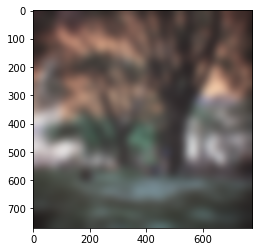

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
image = cv2.imread("inputSeamCarvingMall.jpg")
dst = np.copy(image)
# cv2.GaussianBlur(image, dst, (20,20))
dst = cv2.GaussianBlur(image, (101,101), 0)
plt.imshow(dst)
plt.show()

In [11]:
# filter_size = 21;
# filter_sigma = 3;
# filter = fspecial("gaussain", filter_size, filter_sigma);
# smoothed = imfilter(img, filter, 'symmertric')
# imshow(smoothed)
f_first=[0,-1/2,0,1/2,0]
f_first=np.flip(f_first)
np.convolve(f_first,f_first)

array([ 0.  ,  0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ,  0.  ])

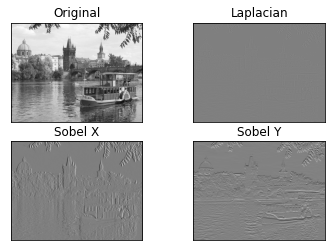

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./inputSeamCarvingPrague.jpg",0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [47]:
# import cv2
# import numpy as np
import scipy.ndimage as ndimg
img = [0,0,1,1,0,0,1,1]
kernel = [1,1,1]
print(ndimg.grey_dilation(img,structure = kernel))
# img_dilation = cv2.dilate(img, kernel, iterations=1) 
# print(img_dilation)


[1 2 2 2 2 2 2 2]


In [50]:
f = [0,-1/2, 0, 1/2, 0]
a = ndimg.convolve(f,[0, 1, 0])
ndimg.convolve(f,a)

array([ 0.25,  0.  , -0.5 ,  0.  ,  0.25])

In [19]:
#export
def cumulative_minimum_energy_map(energyImage, seamDirection):
    """
    Calculates the cumulative minim energy map according to the function:
        
        M(i, j) = e(i, j) + min(M(i-1, j-1), M(i-1, j), M(i-1, j+1))
    
    Inputs: 
        energyImage: Results of passign the input image to energy_image()
        seamDirection: 'HORIZONTAL' or 'VERTICAL'
        
    Output: cumulativeEnergyMap
    
    """
    if(len(energyImage.shape)<3):
    
        M = energyImage.copy()
        r, c= energyImage.shape
        backtrack = np.zeros_like(M, dtype=np.int)
        cumulativeEnergyMap = np.zeros_like(energyImage)
        if (seamDirection == "VERTICAL"):
            for i in range(1, r):
                for j in range(0, c):
                    # Handle the left edge of the image, to ensure we don't index -1
                    if j == 0:
                        idx = np.argmin(M[i - 1, j:j + 2])
                        backtrack[i, j] = idx + j
                        min_energy = M[i - 1, idx + j]
                    else:
                        idx = np.argmin(M[i - 1, j - 1:j + 2])
                        backtrack[i, j] = idx + j - 1
                        min_energy = M[i - 1, idx + j - 1]

                    M[i, j] += min_energy
        else:
            for j in range(1,c):
                for i in range(0,r):
                    # Handle the left edge of the image, to ensure we don't index -1
                    if i == 0:
                        idy = np.argmin(M[i: i+2, j-1])
                        backtrack[i, j] = idy + i
                        min_energy = M[idy + i, j-1]
                    else:
                        idy = np.argmin(M[i - 1: i+2, j - 1])
                        backtrack[i, j] = idy + i - 1
                        min_energy = M[idy + i - 1, j-1]

                    M[i, j] += min_energy
    else: 
        assert len(energyImage.shape) == 3 and energyImage.shape[-1] == 3
        [B, G, R] = np.squeeze(np.split(energyImage, energyImage.shape[-1], -1), axis=-1)
        B = cumulative_minimum_energy_map(B, seamDirection)
        np.clip(B, 0,1, out = B)
        G = cumulative_minimum_energy_map(G, seamDirection)
        np.clip(G, 0,1, out = G)
        R = cumulative_minimum_energy_map(R, seamDirection)
        np.clip(R, 0,1, out = R)
        M=np.dstack((R,G,B))
        print(M[1:10,1:10,1:3])
    
    
    ##########################################################################
    # TODO: Compute the cumulative minimum energy map in the input           #
    # seamDirection for the input energyImage. It is fine it is not fully    #
    # vectorized.                                                            #
    ##########################################################################
        
    return M

(769, 775, 3)


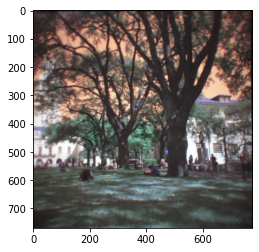

255
15
255
18


<ipython-input-19-62c9fdadbcd6>:34: RuntimeWarning: overflow encountered in ubyte_scalars
  M[i, j] += min_energy


255
0
[[[ 84 132]
  [ 82 136]
  [ 80 134]
  [ 79 127]
  [ 76 123]
  [ 74 122]
  [ 74 120]
  [ 71 118]
  [ 68 115]]

 [[119 193]
  [116 192]
  [115 186]
  [115 185]
  [111 183]
  [109 180]
  [105 177]
  [102 172]
  [ 99 170]]

 [[152 252]
  [151 243]
  [151 242]
  [147 240]
  [144 238]
  [137 233]
  [133 227]
  [131 223]
  [130 223]]

 [[185  42]
  [185  41]
  [180  36]
  [178  37]
  [170  31]
  [165  24]
  [162  19]
  [161  16]
  [159  18]]

 [[217  97]
  [211  91]
  [210  89]
  [202  84]
  [196  76]
  [192  70]
  [191  67]
  [188  66]
  [187  66]]

 [[242 146]
  [240 143]
  [234 140]
  [227 128]
  [221 120]
  [221 118]
  [217 116]
  [216 116]
  [216 118]]

 [[ 15 198]
  [  8 196]
  [  3 184]
  [251 171]
  [251 169]
  [247 167]
  [247 168]
  [247 168]
  [246 168]]

 [[ 43 255]
  [ 39 244]
  [ 39 230]
  [ 39 227]
  [ 27 223]
  [ 29 225]
  [ 32 228]
  [ 35 230]
  [ 35 229]]

 [[ 80  50]
  [ 79  37]
  [ 79  33]
  [ 67  27]
  [ 69  28]
  [ 71  30]
  [ 77  34]
  [ 84  41]
  [ 86  34]]]


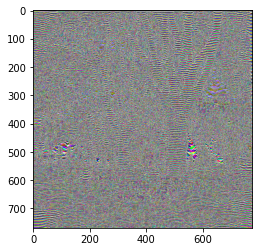

In [33]:
energyImage = cv2.imread("./inputSeamCarvingMall.jpg")
print(energyImage.shape)
seamDirection = "VERTICAL"
plt.imshow(energyImage)
plt.show()
print(np.max(energyImage))
print(np.min(energyImage))

[B, G, R] = np.squeeze(np.split(energyImage, energyImage.shape[-1], -1), axis=-1)
# print(B[1:10,1:10])
print(np.max(B))
print(np.min(B))

B = cumulative_minimum_energy_map(B, seamDirection)
np.clip(B, 0,255, out = B)
G = cumulative_minimum_energy_map(G, seamDirection)
np.clip(G, 0,255, out = G)
R = cumulative_minimum_energy_map(R, seamDirection)
np.clip(R, 0,255, out = R)
M=np.dstack((R,G,B))
print(np.max(M))
print(np.min(M))
print(M[1:10,1:10,1:3])
plt.imshow(M)
plt.show()

In [37]:
temp = list(range(10))
temp.remove(4)
print(temp)

[0, 1, 2, 3, 5, 6, 7, 8, 9]
